# Análisis de la Encuesta Multiproposito

## Importación de Paquetes y carga del archivo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv('Encuesta_Suba_Filtrado_Preguntas.csv', sep = ',')

In [3]:
data.shape

(24536, 419)

**Hay en total 24536 encuestados en la Localidad de Suba**

# Revisión de cada columna

## Segunda Sección (NHCCP)

### NHCCP1
La vivienda ocupada por este hogar es:
1. Propia, totalmente pagada
2. Propia, la están pagando
3. En arriendo, subarriendo
4. Leasing
5. En usufructo
6. Otra forma de tenencia 

**Todos Contestaron**

In [80]:
data['NHCCP1'].count()

24536

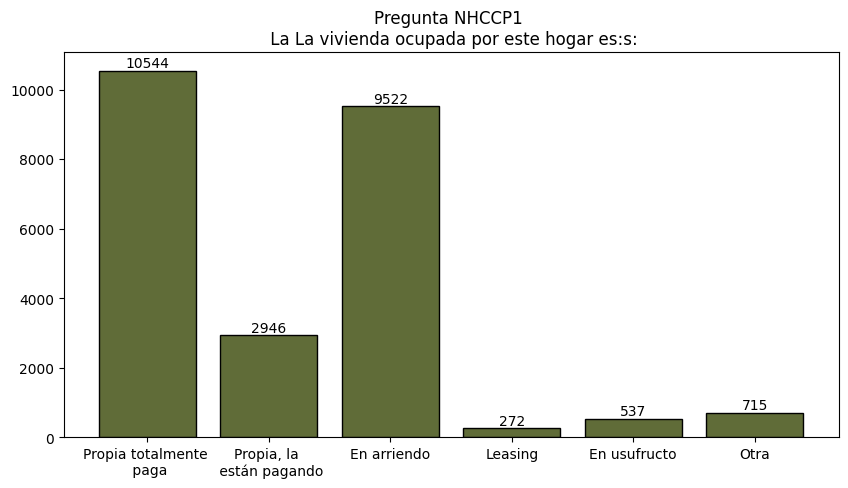

In [81]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP1'].value_counts().index.tolist(),data['NHCCP1'].value_counts().tolist(), edgecolor = 'black', color = '#606c38')
plt.xticks([1,2,3,4,5,6], ['Propia totalmente \n paga', 'Propia, la \n están pagando', 'En arriendo','Leasing','En usufructo','Otra'])
plt.title('Pregunta NHCCP1 \n La La vivienda ocupada por este hogar es:s:')
plt.bar_label(bars)
plt.show()

### NHCCP8_
¿Cuáles de las siguientes fuentes de financiamiento utilizaron para la compra o construcción de esta vivienda (incluida la compra del lote)?

**Solamente contestaron 2865**

In [82]:
finaciamiento = [i for i in data.columns if 'NHCCP8' in str(i)]

In [83]:
for i in finaciamiento:
    print(i, data[i].count())

NHCCP8_1 2865
NHCCP8_2 2865
NHCCP8_3 2865
NHCCP8_4 2865
NHCCP8_5 2865
NHCCP8_6 2865
NHCCP8_7 2865
NHCCP8_8 2865
NHCCP8_9 2865
NHCCP8_10 2865


In [84]:
finaciamiento

['NHCCP8_1',
 'NHCCP8_2',
 'NHCCP8_3',
 'NHCCP8_4',
 'NHCCP8_5',
 'NHCCP8_6',
 'NHCCP8_7',
 'NHCCP8_8',
 'NHCCP8_9',
 'NHCCP8_10']

In [85]:
for i in finaciamiento:
    data[i] = data.apply(lambda x: 0 if (x[i] == 2) else (1 if (x[i] == 1) else 2), axis = 1)

In [86]:
l_finan = ['Crédito bancario hipotecario',
           'Crédito bancario diferente al hipotecario',
           'Crédito con el FNA',
           'Crédito con cooperativas o fondos de empleados',
           'Crédito con fondos de vivienda o cajas de vivienda',
           'Prestamos de amigos o familiares',
           'Cesantias',
           'Recursos Propios o ahorros',
           'Subsidios',
           'Otra']

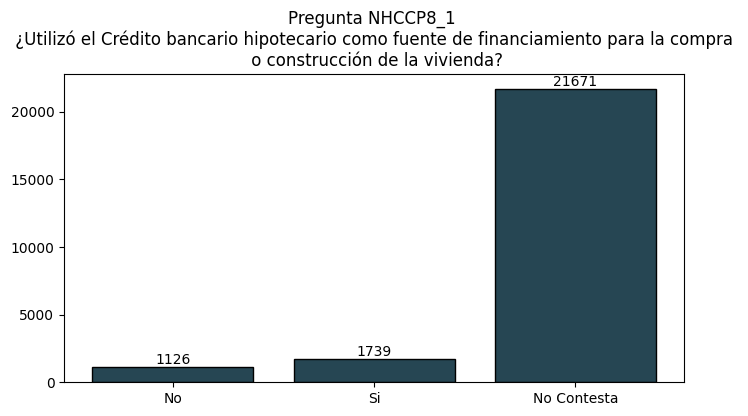

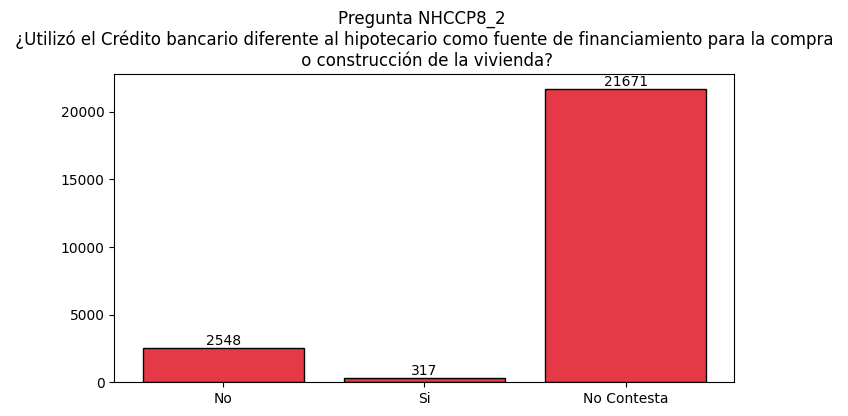

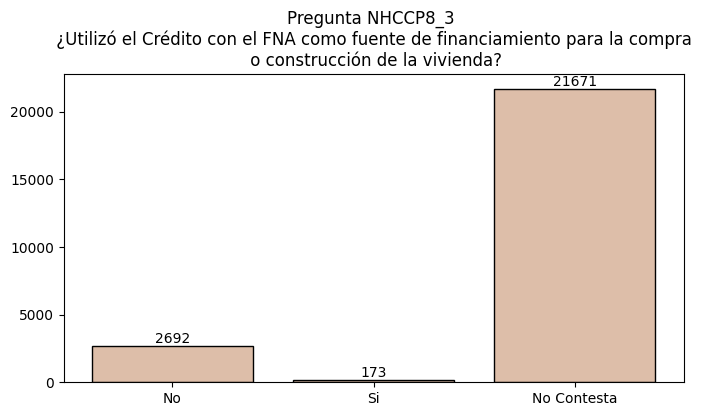

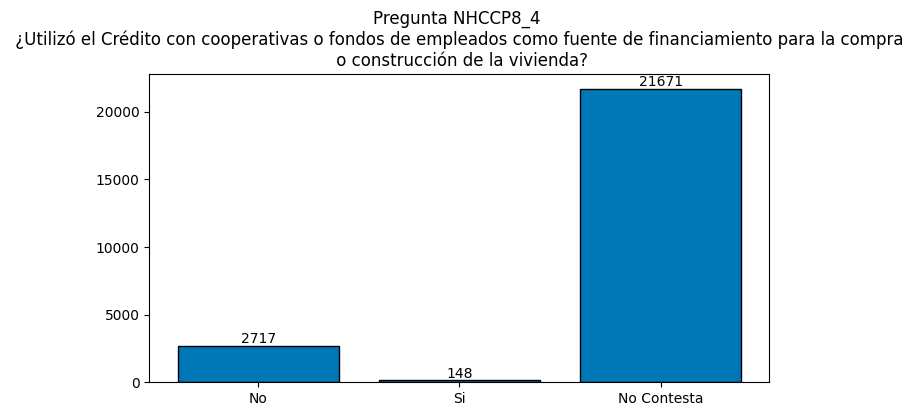

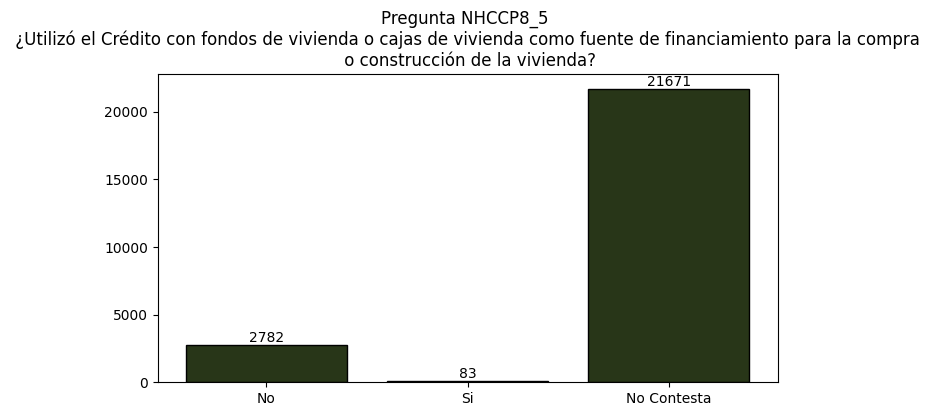

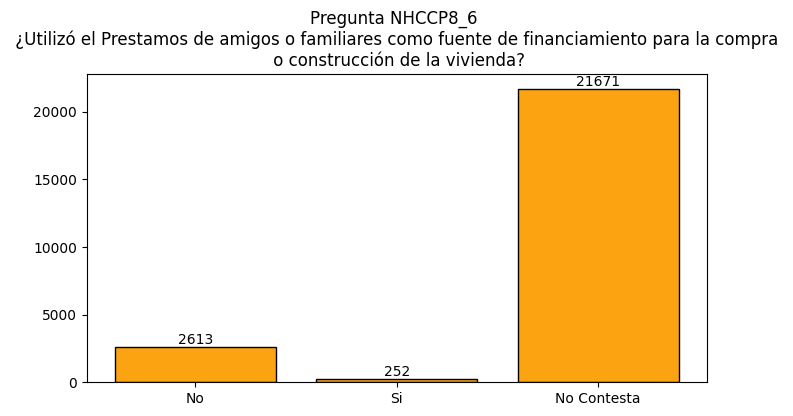

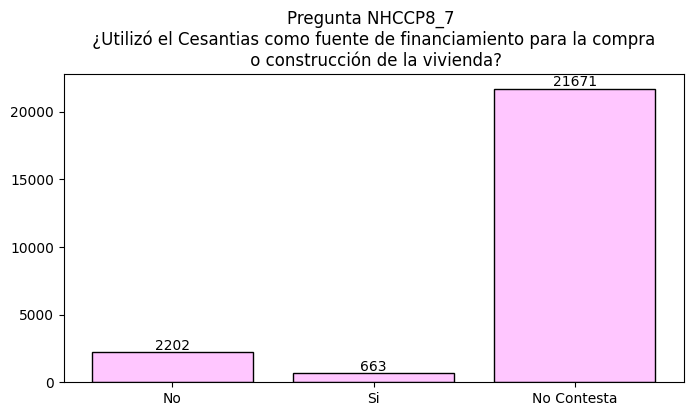

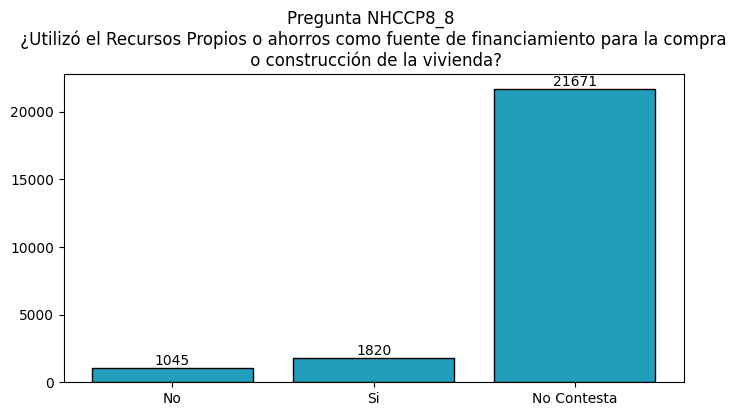

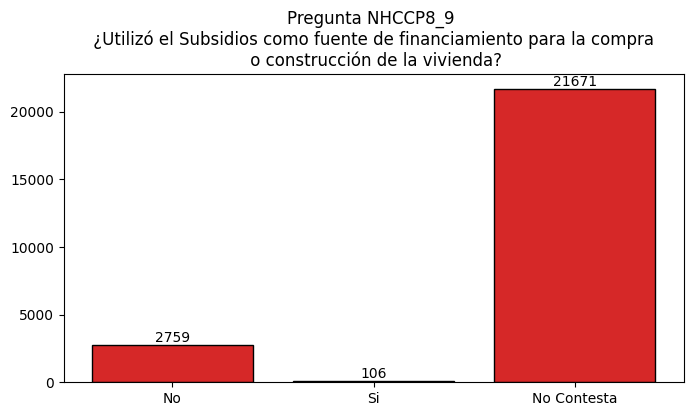

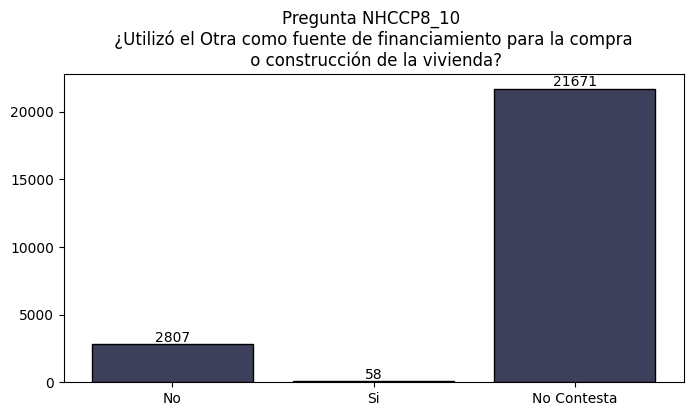

In [87]:
for i,j,z in zip(finaciamiento,l_finan,colors):
    plt.figure(figsize=(8,4))
    bars = plt.bar(data[i].value_counts().index.tolist(),data[i].value_counts().tolist(), edgecolor = 'black', color = z)
    plt.title(f'Pregunta {i} \n ¿Utilizó el {j} como fuente de financiamiento para la compra \n o construcción de la vivienda?')
    plt.xticks([0,1,2],['No','Si','No Contesta'])
    plt.bar_label(bars)
    plt.show()

### NHCCP10
 ¿Cuánto paga MENSUALMENTE por el arriendo o leasing de esta vivienda?
 
**Solamente contestan 9794**

In [88]:
data['NHCCP10'].describe().apply("{0:.2f}".format)

count        9794.00
mean      1222062.98
std       1291967.78
min            99.00
25%        600000.00
50%        950000.00
75%       1500000.00
max      25000000.00
Name: NHCCP10, dtype: object

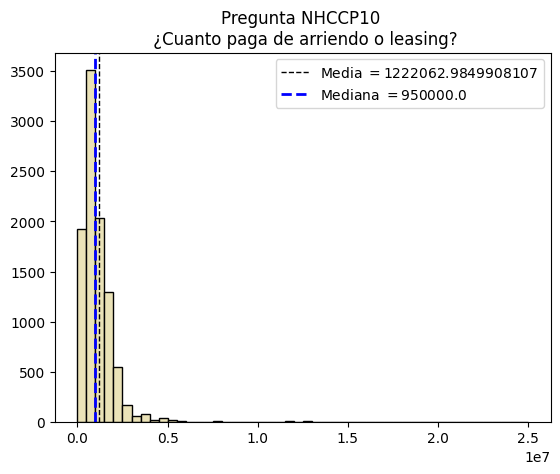

In [89]:
counts, edges, bars = plt.hist(data['NHCCP10'], bins = 50, edgecolor = 'black', color = '#eae2b7')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
#plt.xticks(range(10))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP10 \n ¿Cuanto paga de arriendo o leasing?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP10'].mean(), color='k', linestyle='dashed', linewidth=1, label = f'Media $={data["NHCCP10"].mean()}$')
plt.axvline(data['NHCCP10'].median(), color='b', linestyle='dashed', linewidth=2, label = f'Mediana $={data["NHCCP10"].median()}$')
plt.legend()
plt.show()

### NHCCP10A
¿Cuenta con contrato escrito de arrendamiento?

0. No
1. Si
2. No contesta

**Solo contestan 9522**

In [90]:
data['NHCCP10A'].count()

9522

In [91]:
data['NHCCP10A'] = data.apply(lambda x: 0 if (x['NHCCP10A'] == 2) else (1 if (x['NHCCP10A'] == 1) else 2), axis = 1) 

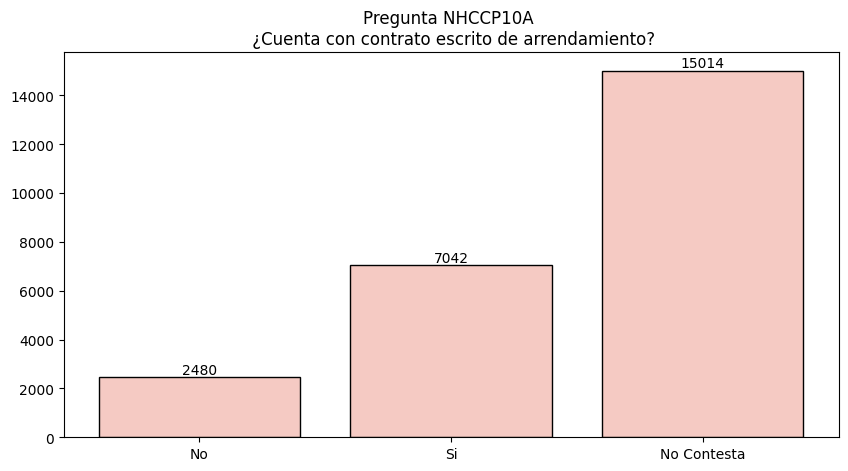

In [92]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP10A'].value_counts().index.tolist(),data['NHCCP10A'].value_counts().tolist(), edgecolor = 'black', color = '#f5cac3')
plt.xticks([0,1,2], ['No','Si','No Contesta'])
plt.title('Pregunta NHCCP10A \n ¿Cuenta con contrato escrito de arrendamiento?')
plt.bar_label(bars)
plt.show()

### NHCCP10B
¿Cuenta con contrato escrito de arrendamiento?
¿A raíz de las medidas tomadas por la pandemia del coronavirus (Covid-19), entre marzo de 2020 y el momento actual se atrasó o dejo de pagar alguna cuota de arrendamiento?

0. No
1. Si
2. No contesta

**Solo contestan 9522**


In [93]:
data['NHCCP10B'].count()

9522

In [94]:
data['NHCCP10B'].value_counts()

2.0    6618
1.0    2904
Name: NHCCP10B, dtype: int64

In [95]:
data['NHCCP10B'] = data.apply(lambda x: 0 if (x['NHCCP10B'] == 2) else (1 if (x['NHCCP10B'] == 1) else 2), axis = 1)

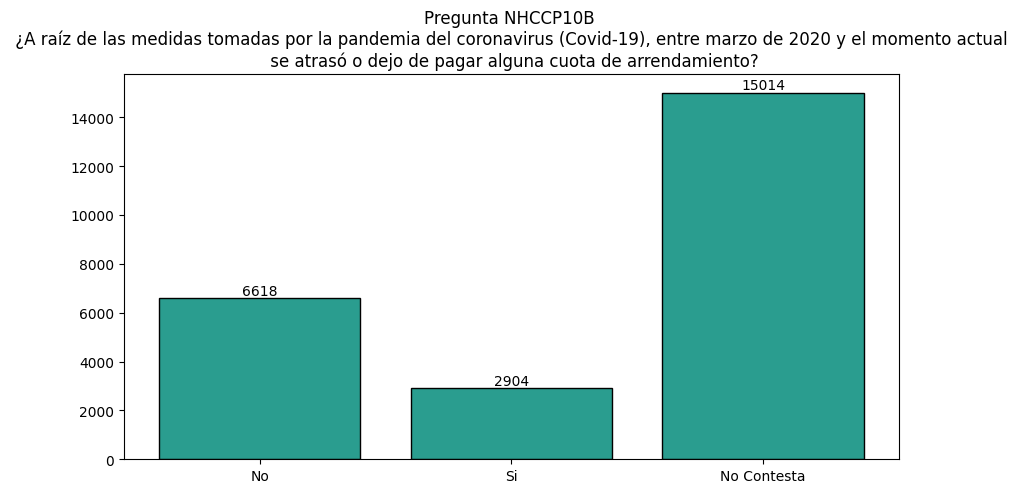

In [96]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP10B'].value_counts().index.tolist(),data['NHCCP10B'].value_counts().tolist(), edgecolor = 'black', color = '#2a9d8f')
plt.xticks([0,1,2], ['No','Si','No Contesta'])
plt.title('Pregunta NHCCP10B \n ¿A raíz de las medidas tomadas por la pandemia del coronavirus (Covid-19), entre marzo de 2020 y el momento actual \n se atrasó o dejo de pagar alguna cuota de arrendamiento?')
plt.bar_label(bars)
plt.show()

### NHCCP13
¿Cuáles de las siguientes fuentes de financiamiento piensan utilizar para la compra de esta vivienda?

0. No
1. Si
2. No Contesta

**Solo contestaron 5609**

In [97]:
financiamiento = [i for i in data.columns if 'NHCCP13' in str(i)]

In [98]:
for i in financiamiento:
    print(i, data[i].count())

NHCCP13A 5609
NHCCP13B 5609
NHCCP13C 5609
NHCCP13D 5609
NHCCP13E 5609
NHCCP13F 5609
NHCCP13G 5609
NHCCP13H 5609
NHCCP13I 5609
NHCCP13J 5609


In [99]:
financiamiento

['NHCCP13A',
 'NHCCP13B',
 'NHCCP13C',
 'NHCCP13D',
 'NHCCP13E',
 'NHCCP13F',
 'NHCCP13G',
 'NHCCP13H',
 'NHCCP13I',
 'NHCCP13J']

In [100]:
for i in financiamiento:
    data[i] = data.apply(lambda x: 0 if (x[i] == 2) else (1 if (x[i] == 1) else (1 if x[i] == 1 else 2)), axis = 1)

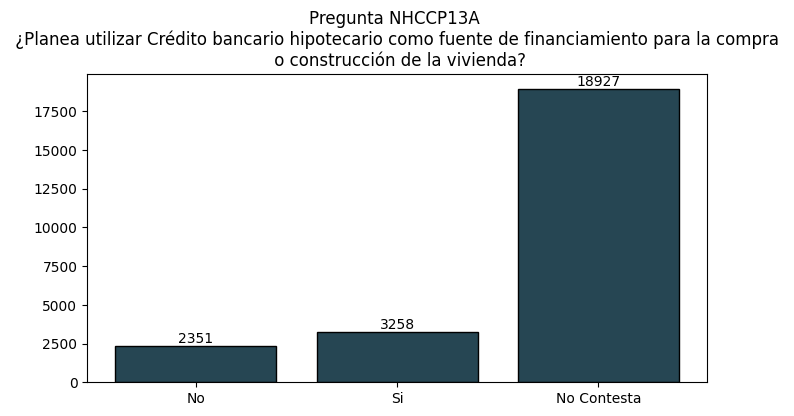

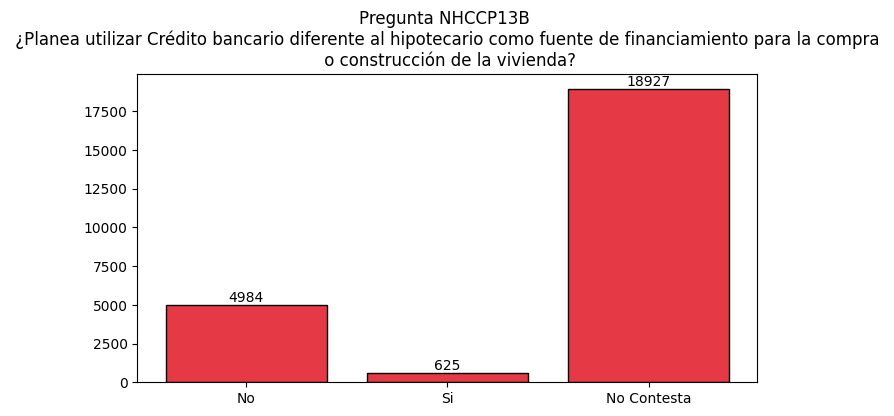

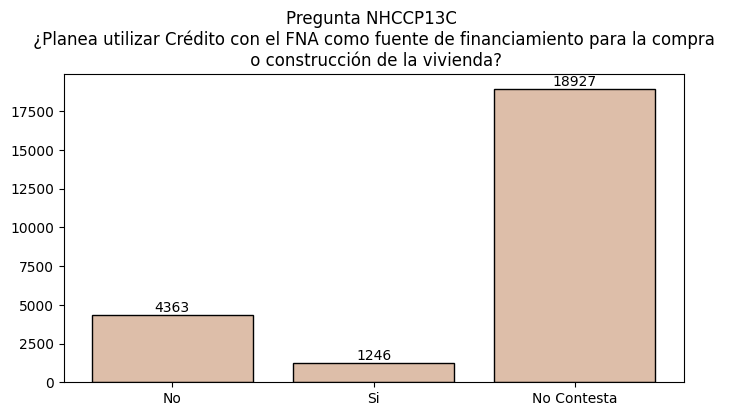

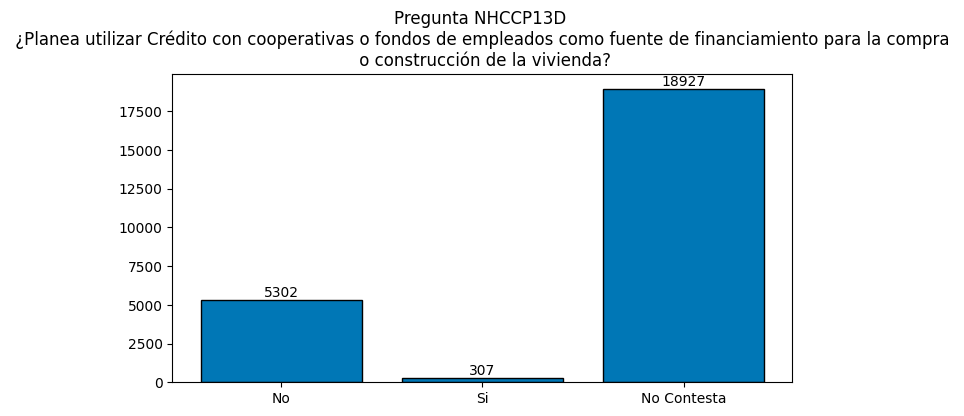

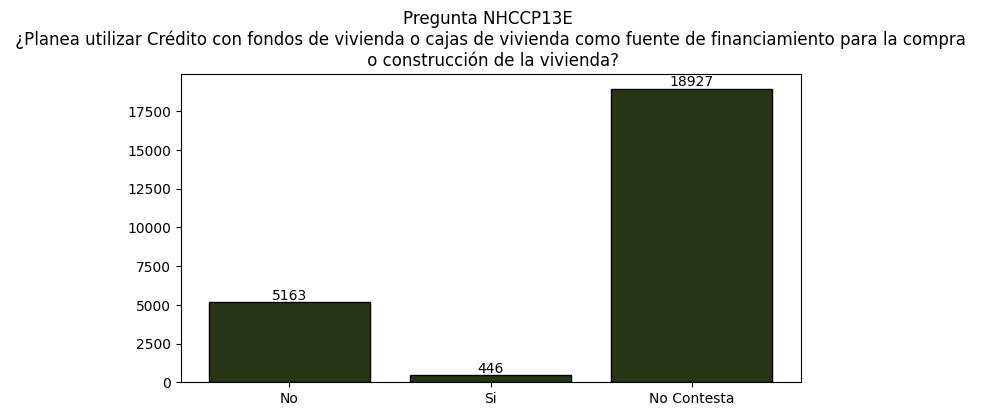

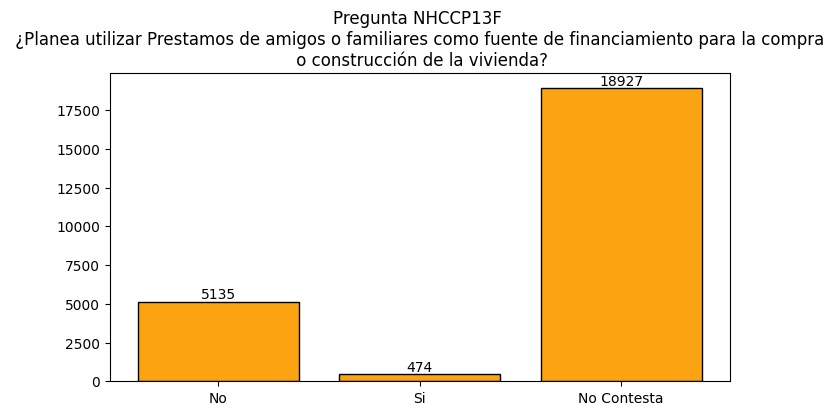

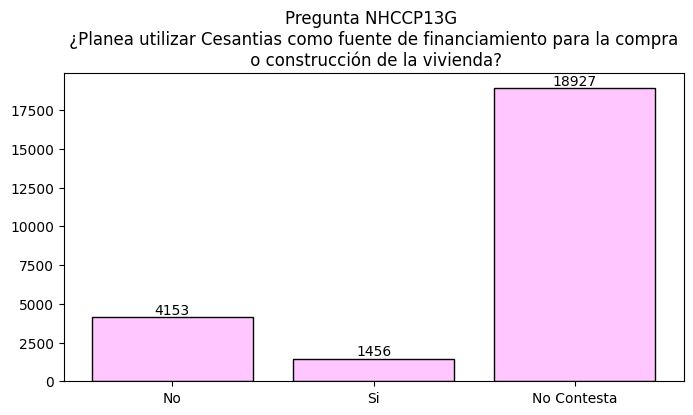

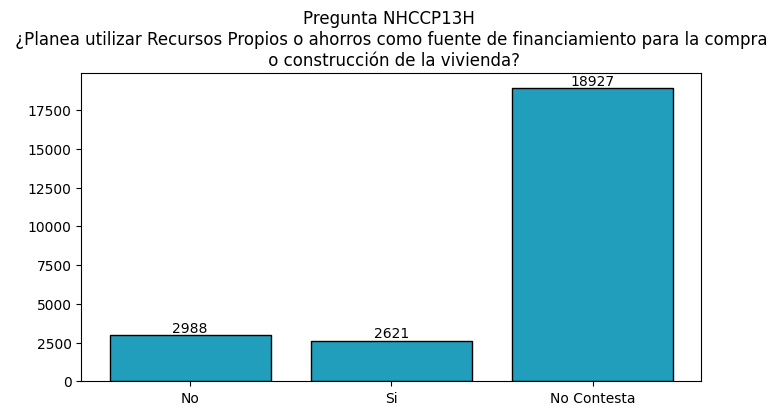

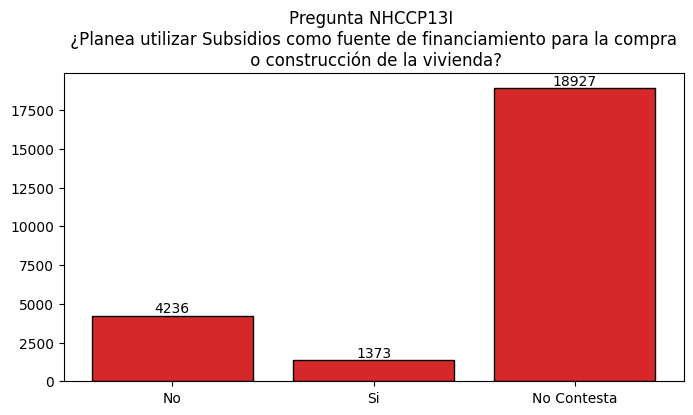

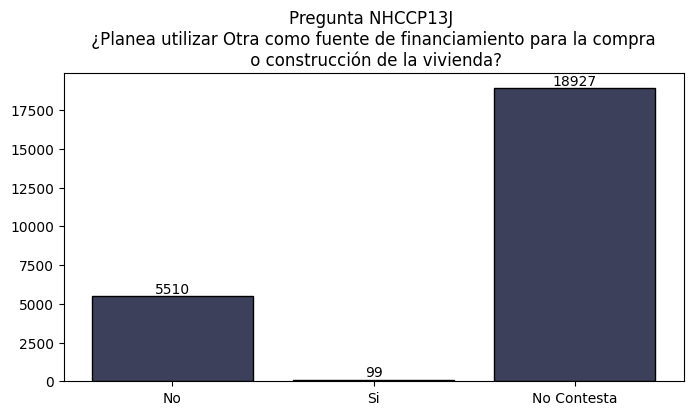

In [101]:
for i,j,z in zip(financiamiento,l_finan,colors):
    plt.figure(figsize=(8,4))
    bars = plt.bar(data[i].value_counts().index.tolist(),data[i].value_counts().tolist(), edgecolor = 'black', color = z)
    plt.title(f'Pregunta {i} \n ¿Planea utilizar {j} como fuente de financiamiento para la compra \n o construcción de la vivienda?')
    plt.xticks([0,1,2],['No','Si','No Contesta'])
    plt.bar_label(bars)
    plt.show()

### NHCCPCTRL2
¿Cuántas personas componen este hogar?

**Todos Contestaron**

In [102]:
data['NHCCPCTRL2'].count()

24536

In [103]:
data['NHCCPCTRL2'].describe().apply("{0:.2f}".format)

count    24536.00
mean         3.29
std          1.36
min          1.00
25%          2.00
50%          3.00
75%          4.00
max         10.00
Name: NHCCPCTRL2, dtype: object

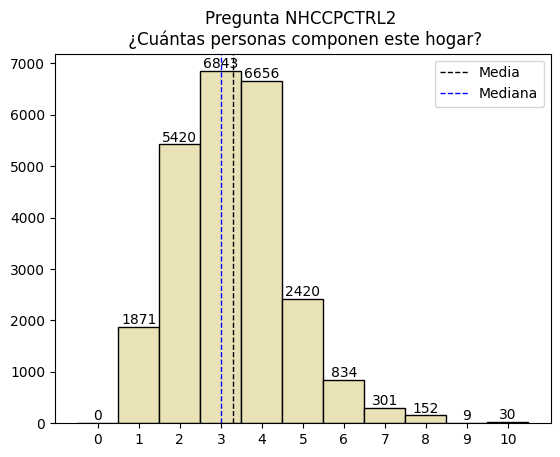

In [104]:
counts, edges, bars = plt.hist(data['NHCCPCTRL2'], bins = np.arange(12)-0.5, edgecolor = 'black', color = '#eae2b7')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
plt.xticks(range(11))
plt.bar_label(bars)
plt.title('Pregunta NHCCPCTRL2 \n ¿Cuántas personas componen este hogar?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCPCTRL2'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCPCTRL2'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

In [105]:
stats.trim_mean(data['NHCCPCTRL2'], 0.125)

3.2059558743614827

### NHCCP20
¿En cuántos de esos cuartos duermen las personas del hogar?

**Todos Contestaron**

In [106]:
data['NHCCP20'].count()

24536

In [107]:
data['NHCCP20'].describe().apply("{0:.2f}".format)

count    24536.00
mean         2.33
std          2.15
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         99.00
Name: NHCCP20, dtype: object

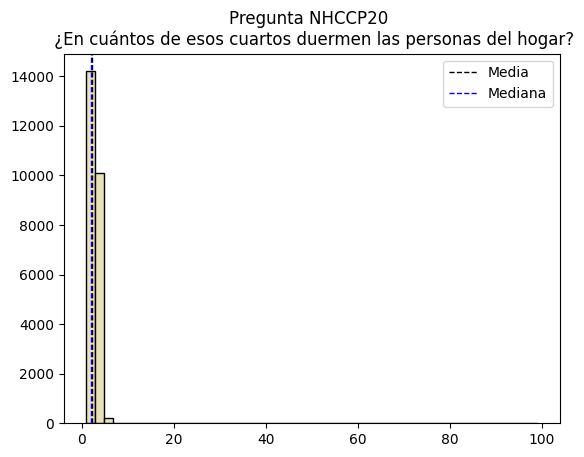

In [108]:
counts, edges, bars = plt.hist(data['NHCCP20'], bins = 50, edgecolor = 'black', color = '#eae2b7')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
#plt.xticks(range(11))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP20 \n ¿En cuántos de esos cuartos duermen las personas del hogar?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP20'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP20'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

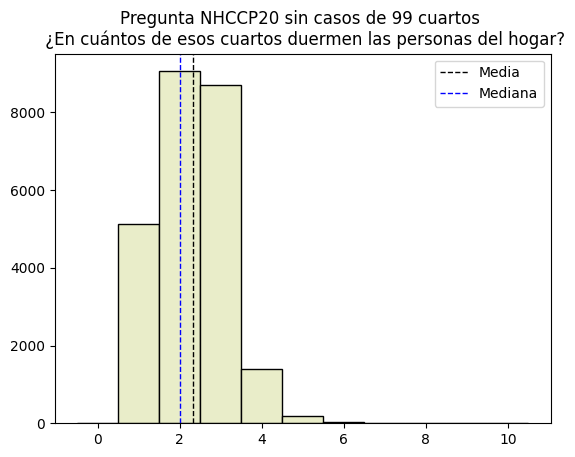

In [109]:
counts, edges, bars = plt.hist(data['NHCCP20'], bins = np.arange(12)-0.5, edgecolor = 'black', color = '#e9edc9')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
#plt.xticks(range(11))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP20 sin casos de 99 cuartos \n ¿En cuántos de esos cuartos duermen las personas del hogar?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP20'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP20'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

### NHCCP26A
¿Cuánto pagaron EL MES PASADO en combustible para cocinar?

**Solo contestan 887**

In [110]:
data['NHCCP26A'].describe().apply("{0:.2f}".format)

count       887.00
mean      79376.07
std       59649.47
min           0.00
25%       68000.00
50%       74000.00
75%       80000.00
max      680000.00
Name: NHCCP26A, dtype: object

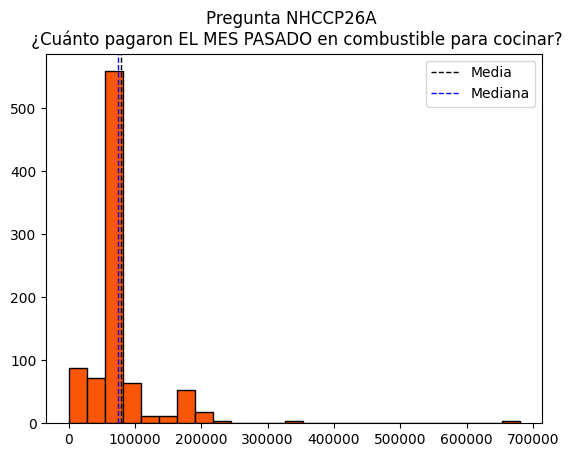

In [111]:
counts, edges, bars = plt.hist(data['NHCCP26A'], bins= 25, edgecolor = 'black', color = '#fb5607')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
#plt.xticks(range(11))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP26A \n ¿Cuánto pagaron EL MES PASADO en combustible para cocinar?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP26A'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP26A'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

### NHCCP27
El agua para preparar los alimentos (o beber) la obtienen principalmente de:
1. Acueducto público
2. Acueducto comunal o veredal
3. Pozo con bomba
4. Pozo sin bomba, aljibe, jagüey o barreno
5. Agua lluvia
6. Río, quebrada, manantial o nacimiento
7. Pila pública
8. Aguatero
9. Carrotanque
10. Agua embotellada o en bolsa

**Todos Contestaron**

In [112]:
data['NHCCP27'].count()

24536

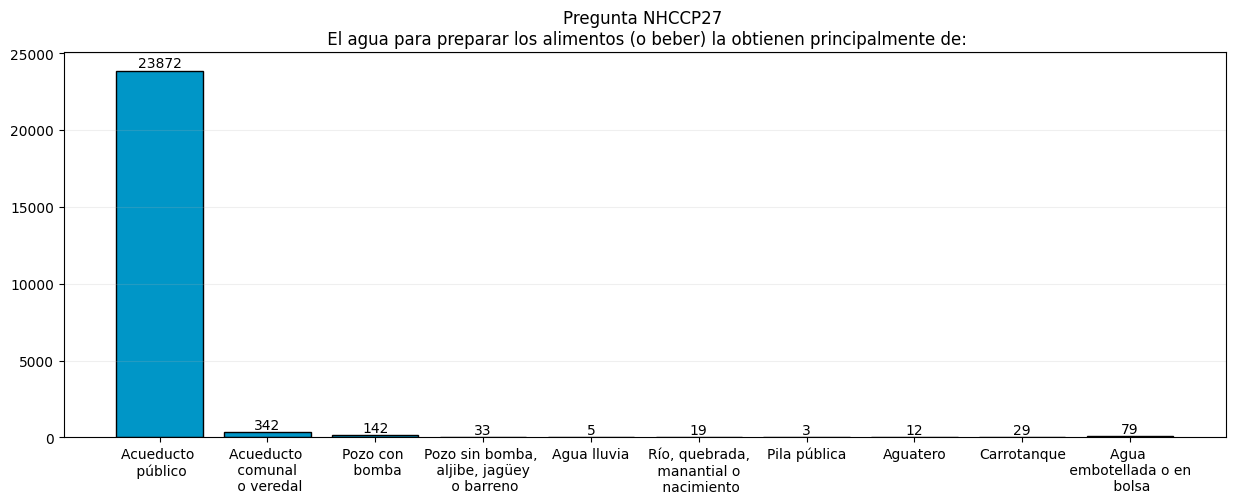

In [113]:
plt.figure(figsize=(15,5))
bars = plt.bar(data['NHCCP27'].value_counts().index.tolist(),data['NHCCP27'].value_counts().tolist(), edgecolor = 'black', color = '#0096c7')
plt.title('Pregunta NHCCP27 \n El agua para preparar los alimentos (o beber) la obtienen principalmente de:')
plt.xticks([1,2,3,4,5,6,7,8,9,10],['Acueducto \n público',
                                   'Acueducto \n comunal \n o veredal',
                                   'Pozo con \n bomba',
                                   'Pozo sin bomba, \n aljibe, jagüey \n o barreno',
                                   'Agua lluvia',
                                   'Río, quebrada,\n manantial o \n nacimiento',
                                   'Pila pública',
                                   'Aguatero',
                                   'Carrotanque',
                                   'Agua \n embotellada o en \n bolsa'])
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP28
¿El agua llega al hogar todos los 7 días de la semana?

0. No
1. Si
2. No contesta


In [114]:
data['NHCCP28'].count()

24214

In [115]:
data['NHCCP28'] = data.apply(lambda x: 0 if (x['NHCCP28'] == 2) else (1 if x['NHCCP28'] == 1 else 2), axis = 1)

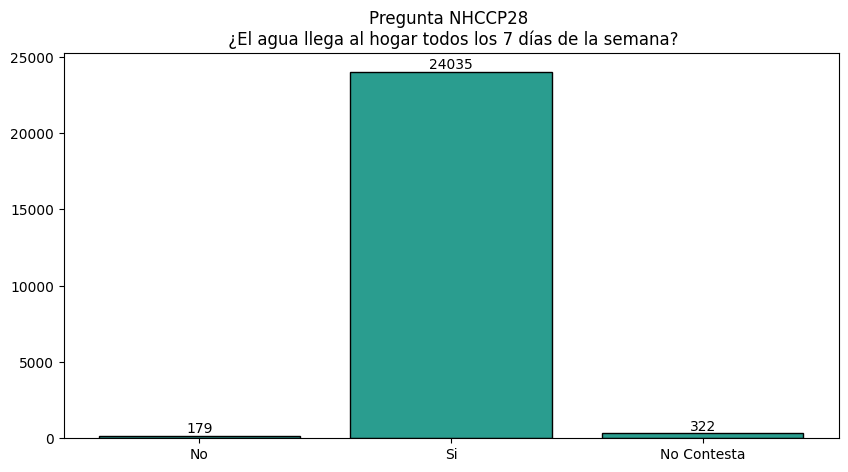

In [116]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP28'].value_counts().index.tolist(),data['NHCCP28'].value_counts().tolist(), edgecolor = 'black', color = '#2a9d8f')
plt.xticks([0,1,2], ['No','Si','No Contesta'])
plt.title('Pregunta NHCCP28 \n ¿El agua llega al hogar todos los 7 días de la semana?')
plt.bar_label(bars)
plt.show()

### NHCCP28A
¿Cuántos días a la semana llega?

**Solo contestan 179**

In [117]:
data['NHCCP28A'].count()

179

In [118]:
data['NHCCP28A'].describe().apply("{0:.2f}".format)

count    179.00
mean       5.52
std        1.67
min        1.00
25%        5.00
50%        6.00
75%        6.00
max        8.00
Name: NHCCP28A, dtype: object

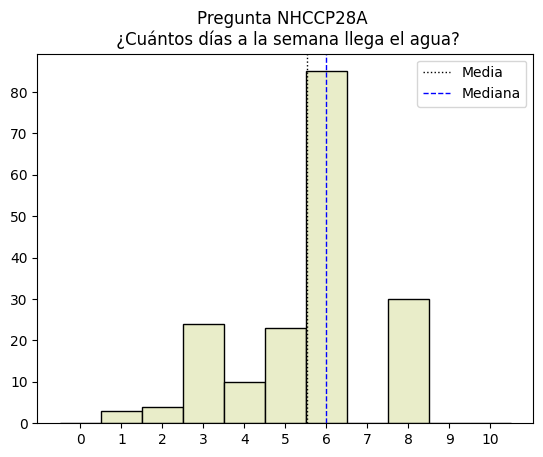

In [119]:
counts, edges, bars = plt.hist(data['NHCCP28A'], bins = np.arange(12)-0.5, edgecolor = 'black', color = '#e9edc9')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
plt.xticks(range(11))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP28A \n ¿Cuántos días a la semana llega el agua?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP28A'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP28A'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

### NHCCP29
¿El suministro es continuo las 24 horas, los días que llega el agua?

**Solo contestan 24214**

In [120]:
data['NHCCP29'].count()

24214

In [121]:
data['NHCCP29'] = data.apply(lambda x: 0 if (x['NHCCP29'] == 2) else (1 if x['NHCCP29'] == 1 else 2), axis = 1)

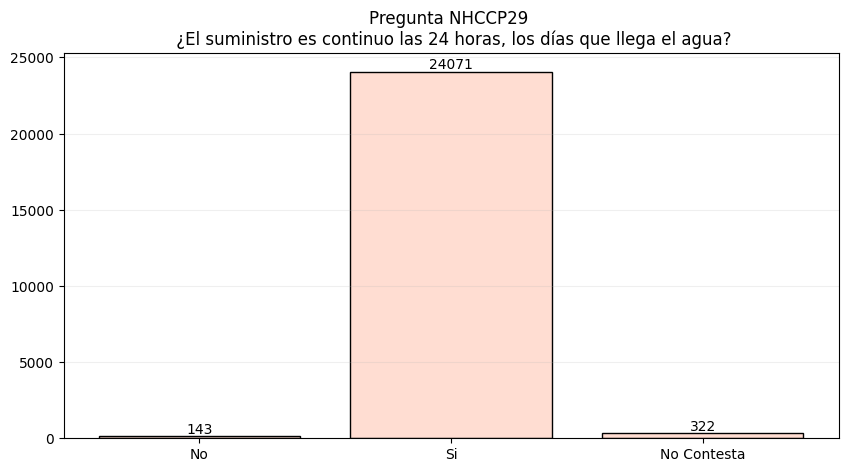

In [122]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP29'].value_counts().index.tolist(),data['NHCCP29'].value_counts().tolist(), edgecolor = 'black', color = '#ffddd2')
plt.xticks([0,1,2], ['No','Si', 'No Contesta'])
plt.title('Pregunta NHCCP29 \n ¿El suministro es continuo las 24 horas, los días que llega el agua?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP29A
¿Cuántas horas al día llega?

**Solo contestan 143**

In [123]:
data['NHCCP29A'].describe().apply("{0:.2f}".format)

count    143.00
mean      14.76
std        7.76
min        1.00
25%        6.00
50%       18.00
75%       22.00
max       23.00
Name: NHCCP29A, dtype: object

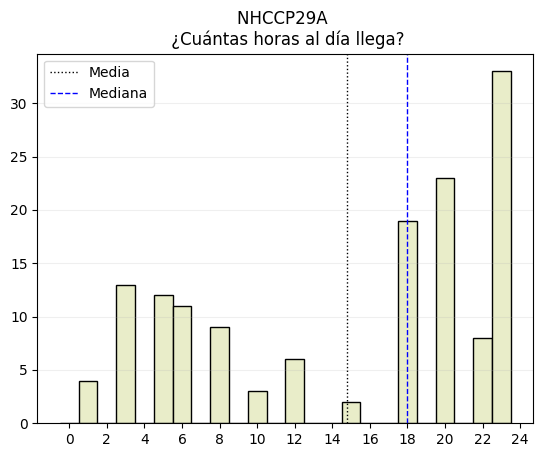

In [124]:
counts, edges, bars = plt.hist(data['NHCCP29A'], bins = np.arange(25)-0.5, edgecolor = 'black', color = '#e9edc9')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
plt.xticks(range(0,26,2))
#plt.bar_label(bars)
plt.title('NHCCP29A \n ¿Cuántas horas al día llega?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP29A'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP29A'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP37
¿Cómo eliminan principalmente la basura en este hogar?
1. La recogen los servicios de aseo
2. La tiran a un río, quebrada, caño o laguna
3. La tiran a un lote, patio, zanja o baldío
4. La queman
5. La entierran
6. La recoge un servicio informal (zorra, carreta, etc)

**Contestan Todos**

In [125]:
data['NHCCP37'].count()

24536

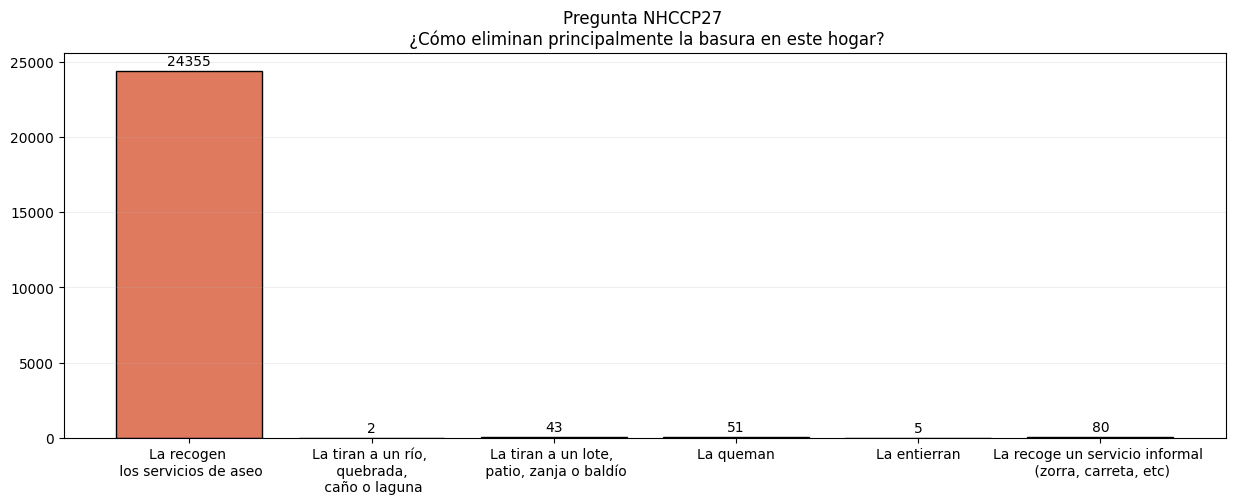

In [126]:
plt.figure(figsize=(15,5))
bars = plt.bar(data['NHCCP37'].value_counts().index.tolist(),data['NHCCP37'].value_counts().tolist(), edgecolor = 'black', color = '#e07a5f')
plt.title('Pregunta NHCCP27 \n ¿Cómo eliminan principalmente la basura en este hogar?')
plt.xticks([1,2,3,4,5,6],['La recogen \n los servicios de aseo',
                                   'La tiran a un río, \n quebrada, \n caño o laguna',
                                   'La tiran a un lote, \n patio, zanja o baldío',
                                   'La queman',
                                   'La entierran',
                                   'La recoge un servicio informal \n (zorra, carreta, etc)'])
plt.bar_label(bars, padding = 2)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP38
¿En este hogar clasifican los residuos?

**Contestan Todos**

In [127]:
data['NHCCP38'].count()

24536

In [128]:
data['NHCCP38'].value_counts()

1    20558
2     3978
Name: NHCCP38, dtype: int64

In [129]:
data['NHCCP38'] = data.apply(lambda x: 0 if (x['NHCCP38'] == 2) else 1, axis = 1)

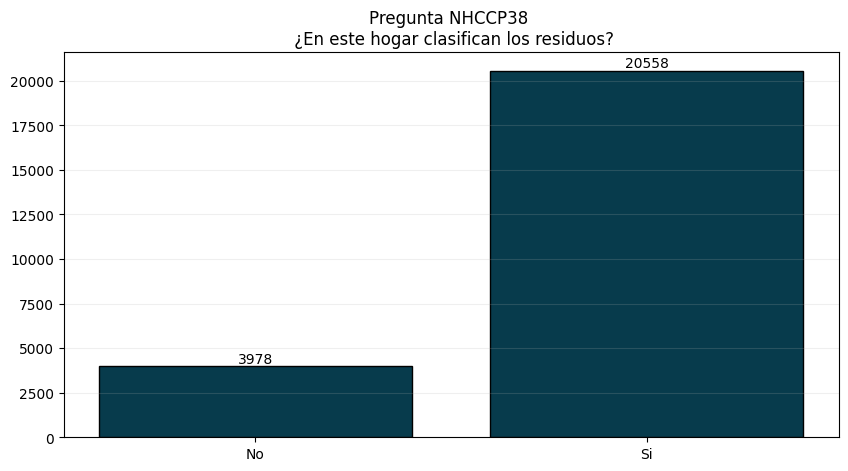

In [130]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP38'].value_counts().index.tolist(),data['NHCCP38'].value_counts().tolist(), edgecolor = 'black', color = '#073b4c')
plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP38 \n ¿En este hogar clasifican los residuos?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP38A
¿Qué tipo de residuos separa?

**Contestan 20558**

In [131]:
residuos  = [i for i in data.columns if 'NHCCP38A' in str(i)]
print(residuos)
for i in residuos:
    print(i,data[i].count())

['NHCCP38AA', 'NHCCP38AB', 'NHCCP38AC', 'NHCCP38AD', 'NHCCP38AF', 'NHCCP38AG']
NHCCP38AA 20558
NHCCP38AB 20558
NHCCP38AC 20558
NHCCP38AD 20558
NHCCP38AF 20558
NHCCP38AG 20558


In [132]:
for i in residuos:
    data[i] = data.apply(lambda x: 0 if (x[i] == 2) else (1 if (x[i] == 1) else 2), axis = 1)

In [133]:
l_res = ['Orgánicos: vegetales y restos de comida',
         'Vidrio',
         'Papel y Cartón',
         'Empaques y envases plásticos',
         'Metales',
         'Otros (Medicamentos, pilas, etc']

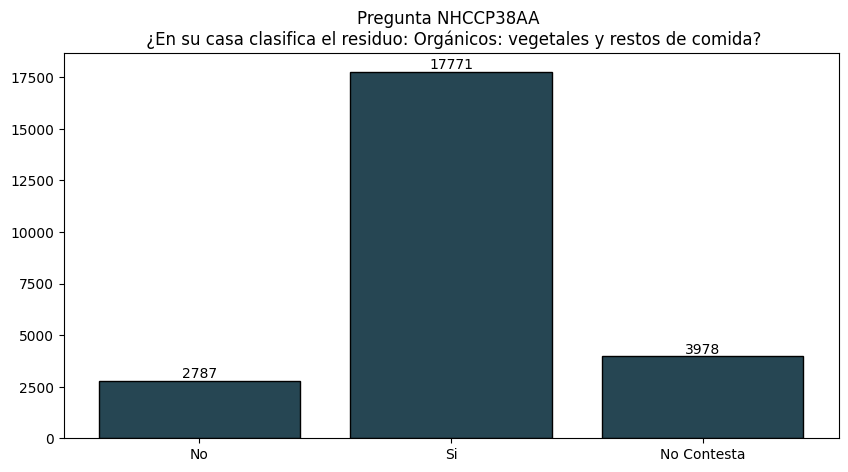

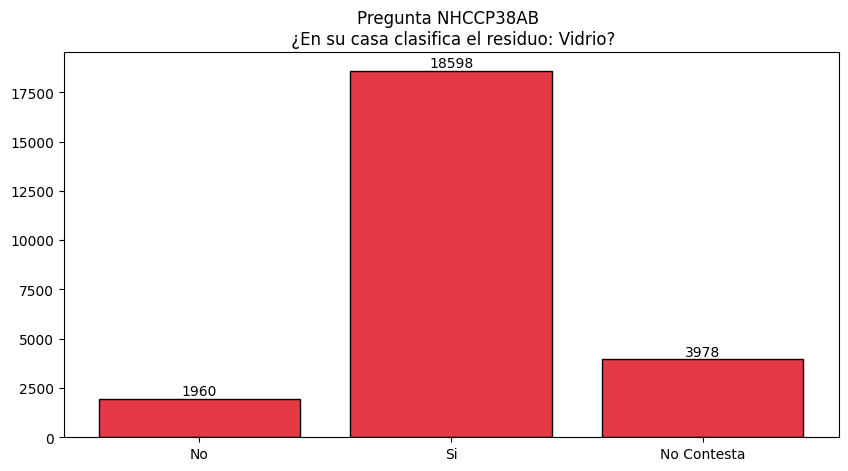

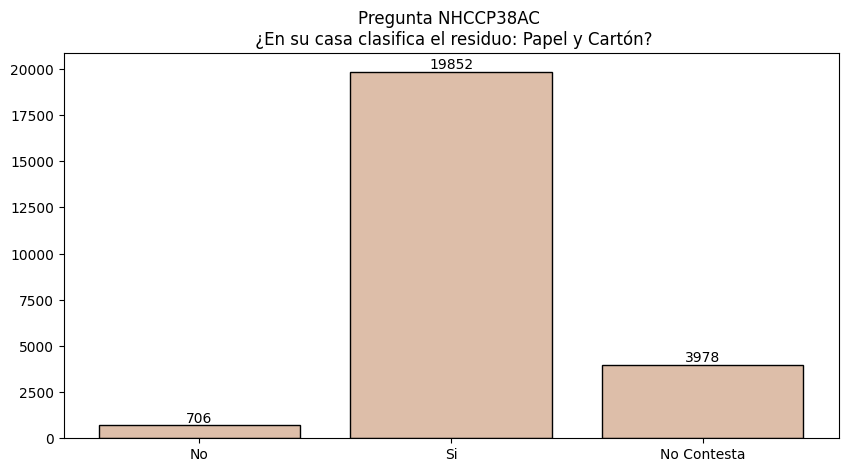

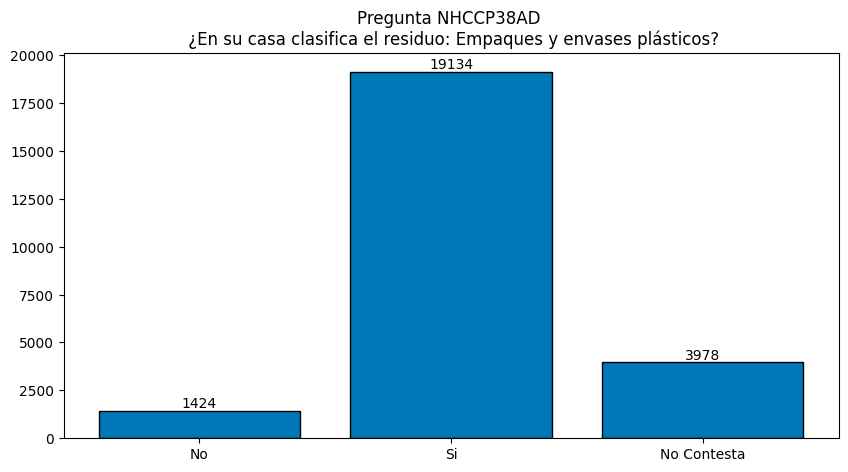

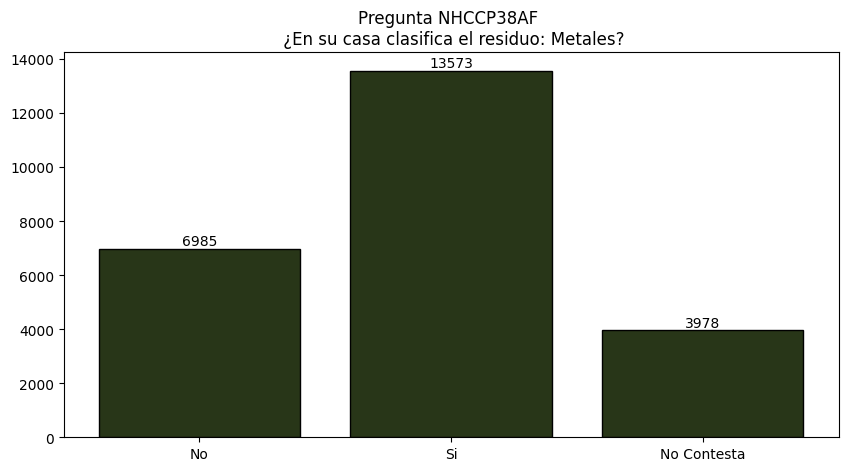

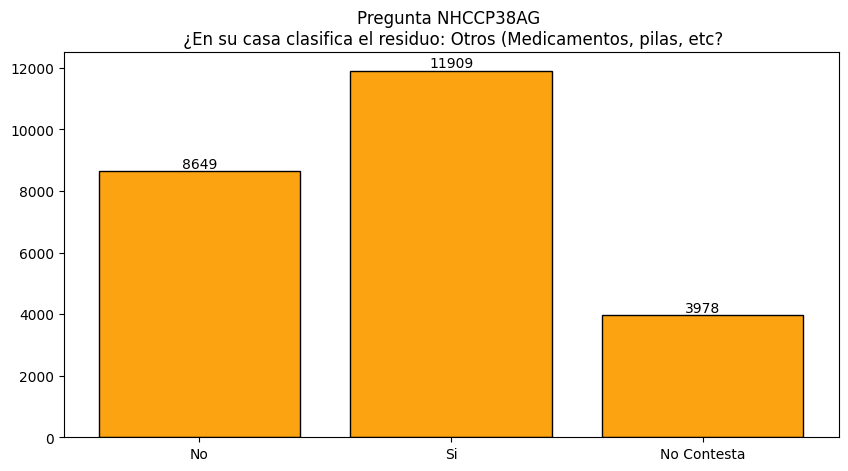

In [134]:
for i,j,z in zip(residuos,l_res,colors):
    plt.figure(figsize=(10,5))
    bars = plt.bar(data[i].value_counts().index.tolist(),data[i].value_counts().tolist(), edgecolor = 'black', color = z)
    plt.title(f'Pregunta {i} \n ¿En su casa clasifica el residuo: {j}?')
    plt.xticks([0,1,2],['No','Si','No Contesta'])
    plt.bar_label(bars)
    plt.show()

### NHCCP38B
¿Cuál es la razón principal por la que no separa los residuos?
1. Falta de espacio
2. No saben cómo hacerlo
3. No vale la pena porque después se junta todo 
4. No reciben beneficio alguno
5. Otra


**Solo contestan 3978**

In [135]:
data['NHCCP38B'].count()

3978

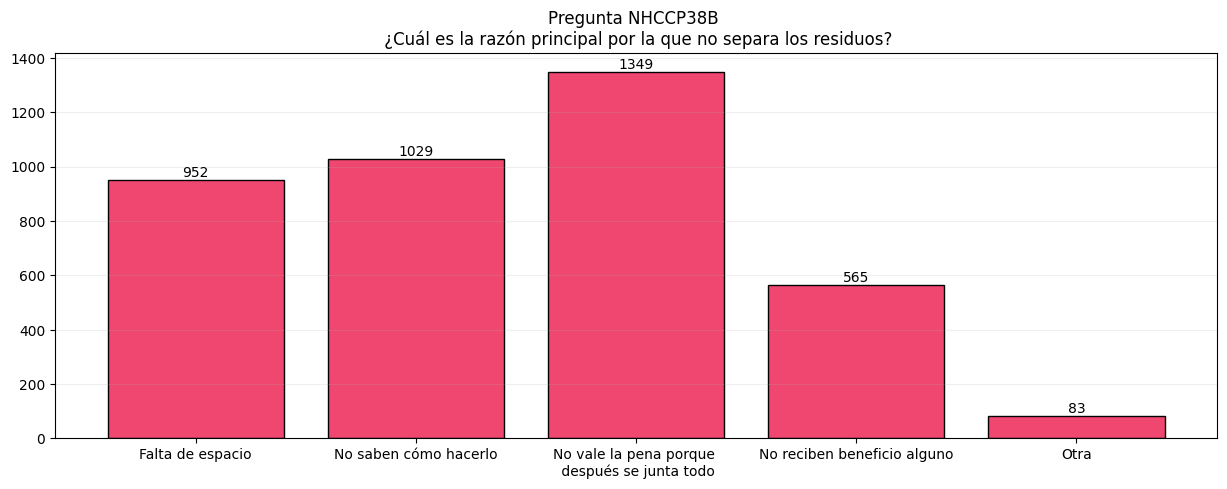

In [136]:
plt.figure(figsize=(15,5))
bars = plt.bar(data['NHCCP38B'].value_counts().index.tolist(),data['NHCCP38B'].value_counts().tolist(), edgecolor = 'black', color = '#ef476f')
plt.title('Pregunta NHCCP38B \n ¿Cuál es la razón principal por la que no separa los residuos?')
plt.xticks([1,2,3,4,5],['Falta de espacio',
                                   'No saben cómo hacerlo',
                                   'No vale la pena porque \n después se junta todo',
                                   'No reciben beneficio alguno',
                                   'Otra',])
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP39
¿Cuáles de las siguientes prácticas realiza este hogar para reducir el consumo de agua y energía eléctrica?

**Todos Contestan**

In [137]:
b_pra  = [i for i in data.columns if 'NHCCP39' in str(i)]
print(b_pra)
for i in b_pra:
    print(i, data[i].count())

['NHCCP39A', 'NHCCP39B', 'NHCCP393', 'NHCCP39C', 'NHCCP39D', 'NHCCP39E', 'NHCCP39F', 'NHCCP39G', 'NHCCP399']
NHCCP39A 24536
NHCCP39B 24536
NHCCP393 24536
NHCCP39C 24536
NHCCP39D 24536
NHCCP39E 24536
NHCCP39F 24536
NHCCP39G 24536
NHCCP399 24536


In [138]:
for i in b_pra:
    data[i] = data.apply(lambda x: 0 if (x[i] == 2) else (1 if (x[i] == 1) else 0), axis = 1)

In [139]:
l_pra = ['Usar luminarias o bombillas de bajo consumo (LED)',
         'Apagar luces',
         'Planchar la mayor cantidad de ropa en cada ocasión o no planchar',
         'Cambiar electrodomésticos por otros de bajo consumo',
         'Desconectar aparatos eléctricos cuando no los usan',
         'Reutilizar agua de la ducha, lavado de ropa, lavamanos y lavaplatos',
        'Recolectar agua lluvia',
        'Usar tanque sanitario de bajo consumo de agua',
        'Instalaron accesorios ahorradores de agua en duchas, lavamanos y lavaplatos']

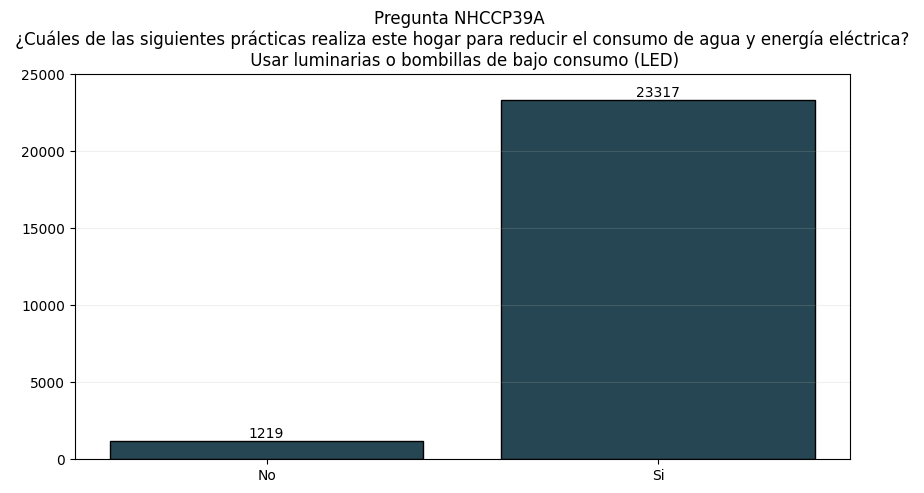

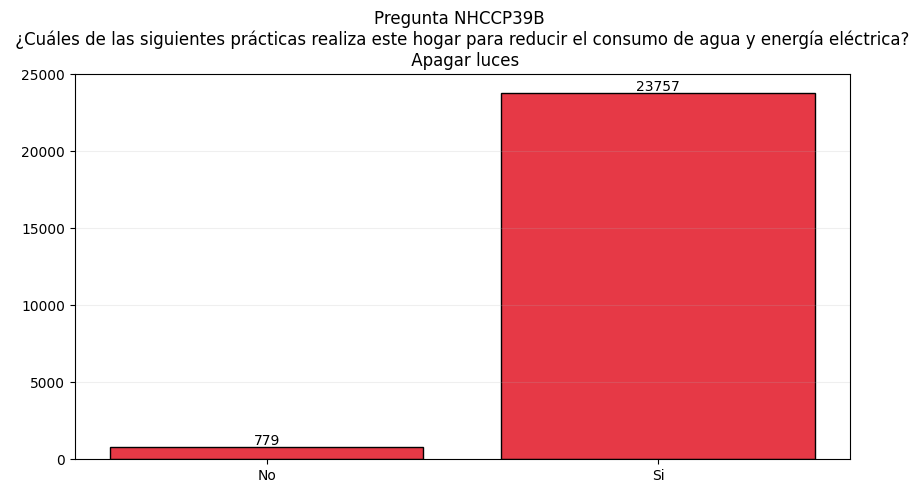

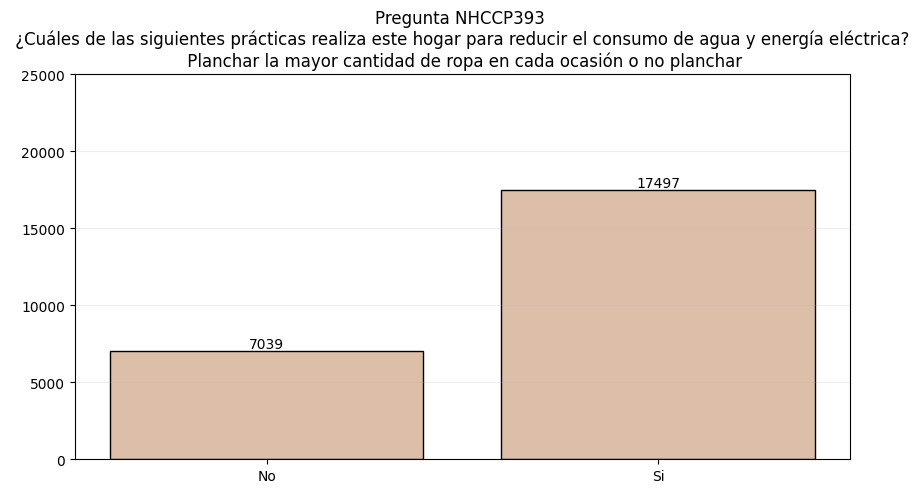

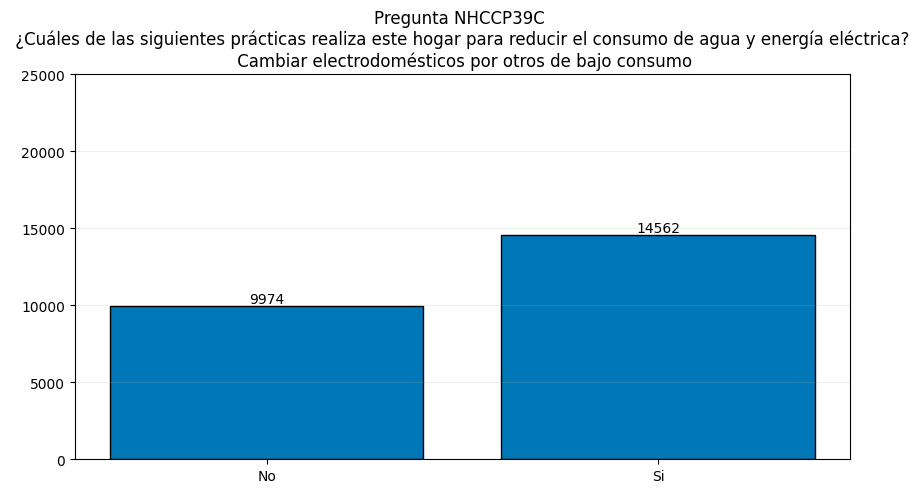

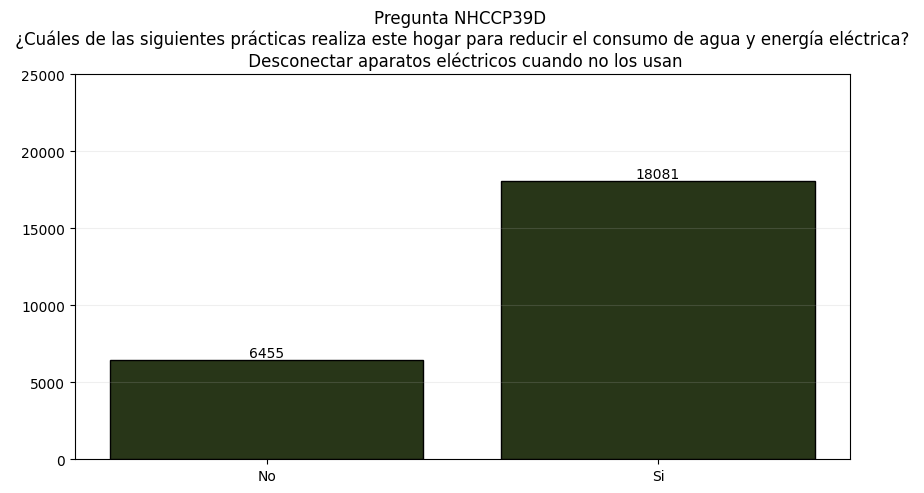

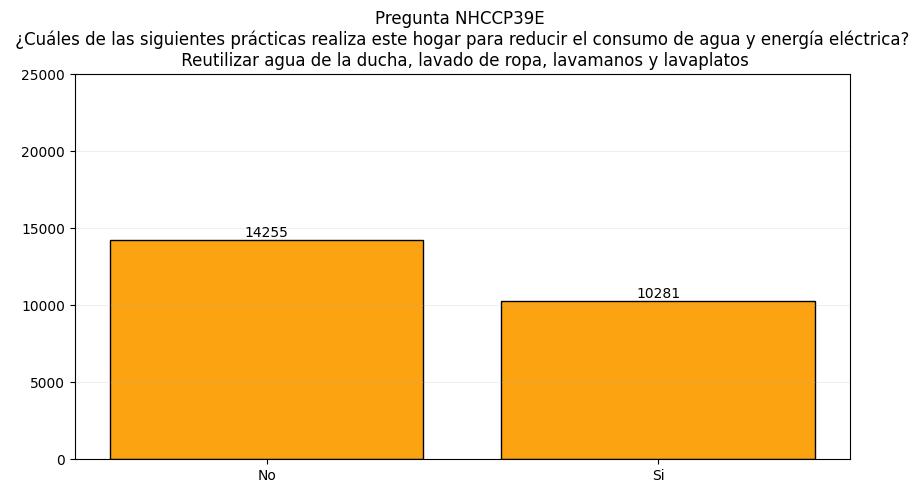

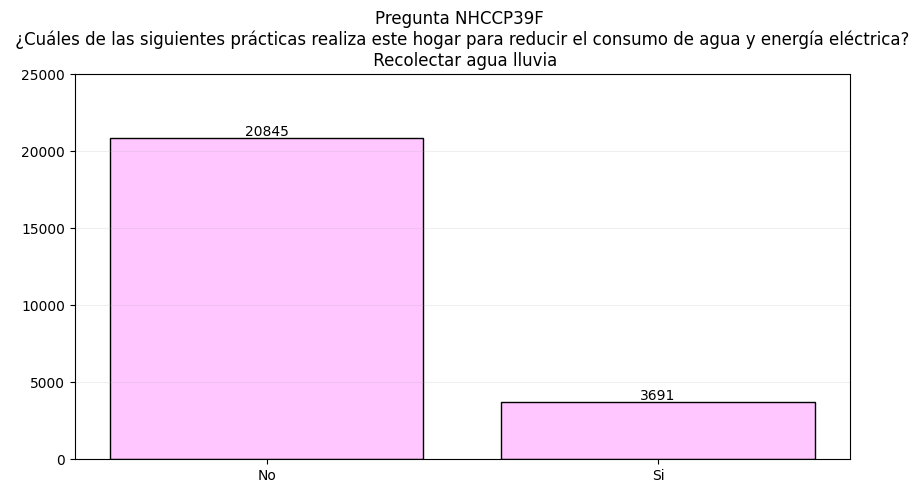

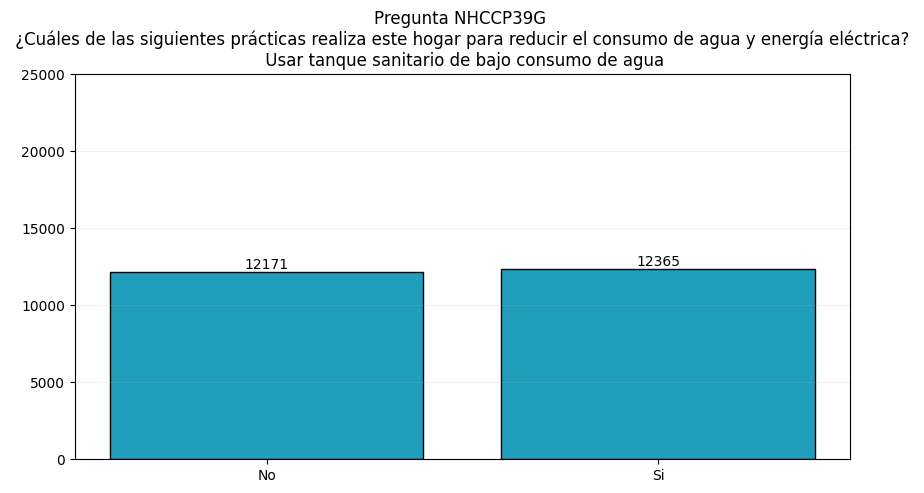

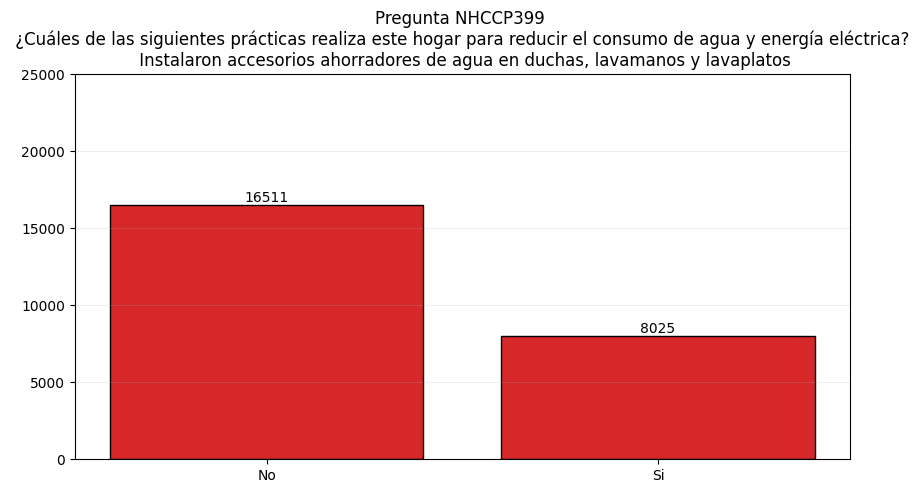

In [140]:
for i,j,z in zip(b_pra,l_pra,colors):
    plt.figure(figsize=(10,5))
    bars = plt.bar(data[i].value_counts().index.tolist(),data[i].value_counts().tolist(), edgecolor = 'black', color = z)
    plt.title(f'Pregunta {i} \n ¿Cuáles de las siguientes prácticas realiza este hogar para reducir el consumo de agua y energía eléctrica? \n {j}')
    plt.xticks([0,1],['No','Si'])
    plt.bar_label(bars)
    plt.ylim((0, 25000))
    plt.grid(alpha = 0.2, axis = 'y')
    plt.show()

### NHCCP41 
¿Las personas de este hogar poseen carro particular?

**Todos Contestan**

In [141]:
data['NHCCP41'].count()

24536

In [142]:
data['NHCCP41'].value_counts()

1    13095
2    11441
Name: NHCCP41, dtype: int64

In [143]:
data['NHCCP41'] = data.apply(lambda x: 0 if (x['NHCCP41'] == 2) else 1, axis = 1)

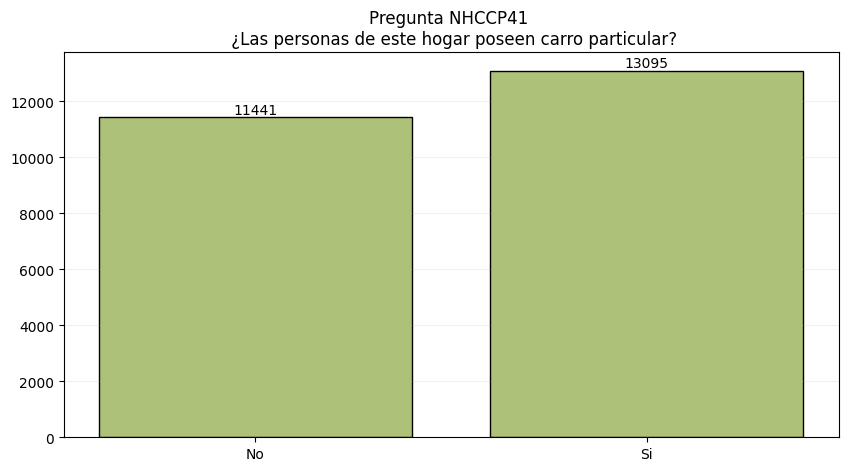

In [144]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP41'].value_counts().index.tolist(),data['NHCCP41'].value_counts().tolist(), edgecolor = 'black', color = '#adc178')
plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP41 \n ¿Las personas de este hogar poseen carro particular?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP44
¿Las personas de este hogar poseen motocicleta?

0. No
1. Si

**Todos Contestan**

In [145]:
data['NHCCP44'].count()

24536

In [146]:
data['NHCCP44'].value_counts()

2    21859
1     2677
Name: NHCCP44, dtype: int64

In [147]:
data['NHCCP44'] = data.apply(lambda x: 0 if (x['NHCCP44'] == 2) else 1, axis = 1)

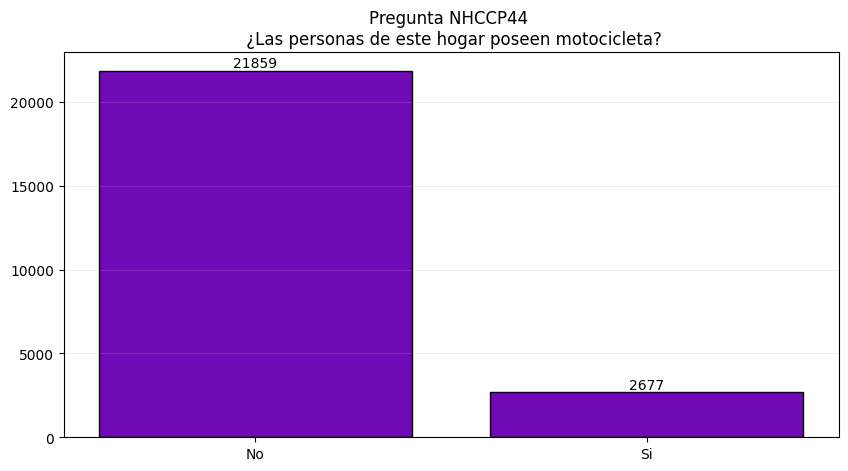

In [148]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP44'].value_counts().index.tolist(),data['NHCCP44'].value_counts().tolist(), edgecolor = 'black', color = '#7209b7')
plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP44 \n ¿Las personas de este hogar poseen motocicleta?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP45
¿Las personas de este hogar poseen bicicleta?

**Todos Contestan**

In [149]:
data['NHCCP45'].count()

24536

In [150]:
data['NHCCP45'].value_counts()

1    12812
2    11724
Name: NHCCP45, dtype: int64

In [151]:
data['NHCCP45'] = data.apply(lambda x: 0 if (x['NHCCP45'] == 2) else 1, axis = 1)

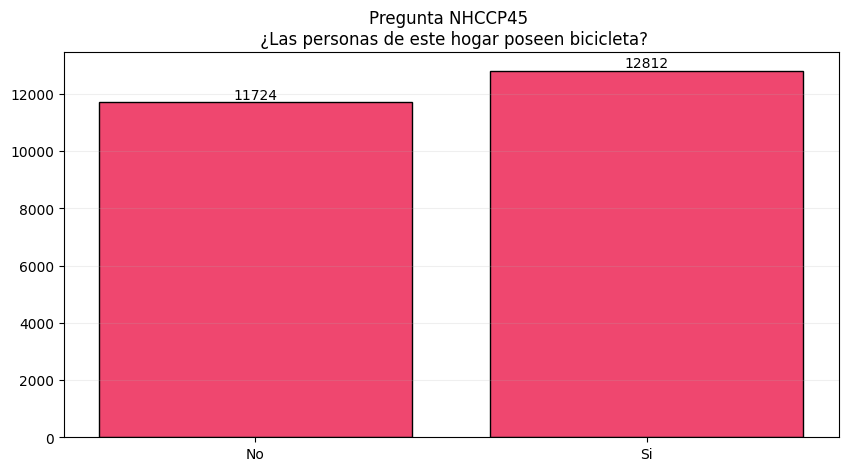

In [152]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP45'].value_counts().index.tolist(),data['NHCCP45'].value_counts().tolist(), edgecolor = 'black', color = '#ef476f')
plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP45 \n ¿Las personas de este hogar poseen bicicleta?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

#### NHCCP45A
¿Cuántas?

**Contestan Aquellos que contestaron si la anterior, 12812**

In [153]:
data['NHCCP45A'].describe().apply("{0:.2f}".format)

count    12812.00
mean         1.90
std          1.01
min          1.00
25%          1.00
50%          2.00
75%          2.00
max          8.00
Name: NHCCP45A, dtype: object

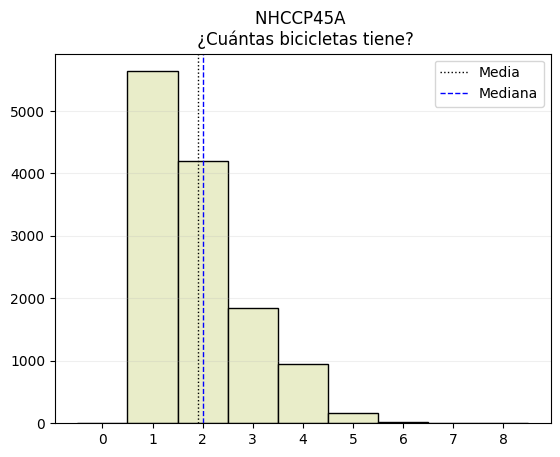

In [154]:
counts, edges, bars = plt.hist(data['NHCCP45A'], bins = np.arange(10)-0.5, edgecolor = 'black', color = '#e9edc9')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
plt.xticks(range(9))
#plt.bar_label(bars)
plt.title('NHCCP45A \n ¿Cuántas bicicletas tiene?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP45A'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP45A'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

#### NHCCP45B
¿Cuántas se utilizan como medio de transporte para ir a trabajar, estudiar, hacer diligencias o visitar familiares y amigos?

**Contestan los 12812**

In [155]:
data['NHCCP45B'].describe().apply("{0:.2f}".format)

count    12812.00
mean         0.73
std          0.92
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          6.00
Name: NHCCP45B, dtype: object

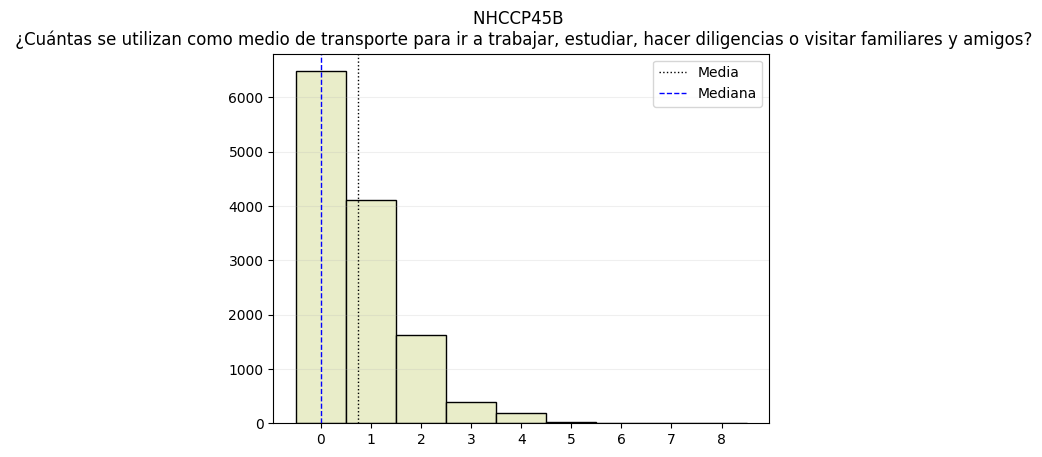

In [156]:
counts, edges, bars = plt.hist(data['NHCCP45B'], bins = np.arange(10)-0.5, edgecolor = 'black', color = '#e9edc9')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
plt.xticks(range(9))
#plt.bar_label(bars)
plt.title('NHCCP45B \n ¿Cuántas se utilizan como medio de transporte para ir a trabajar, estudiar, hacer diligencias o visitar familiares y amigos?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP45B'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP45B'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP41_A
¿En el ÚLTIMO AÑO algún miembro de este hogar ha tenido accidentes transportándose en bicicleta?

0. No
1. Si
2. No contesta

**Contestan 6333**

In [157]:
data['NHCCP41_A'].count()

6333

In [158]:
data['NHCCP41_A'].value_counts()

2.0    5601
1.0     732
Name: NHCCP41_A, dtype: int64

In [159]:
data['NHCCP41_A'] = data.apply(lambda x: 0 if (x['NHCCP41_A'] == 2) else (1 if (x['NHCCP41_A'] == 1) else 2), axis = 1) 

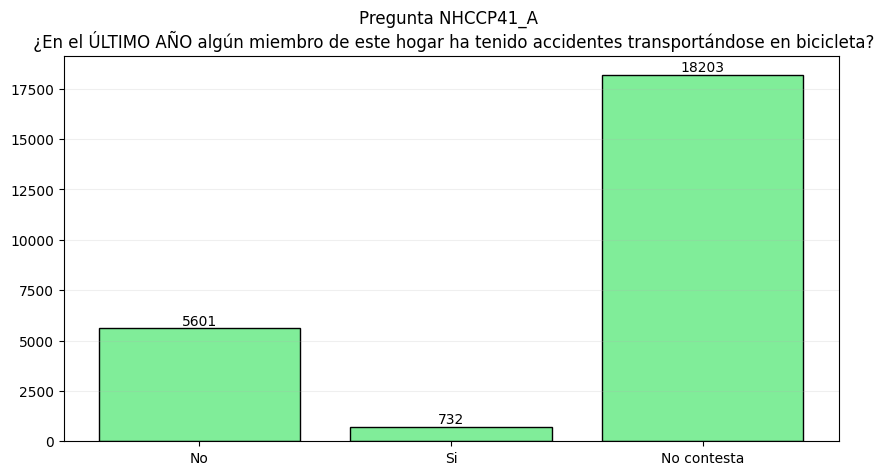

In [160]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP41_A'].value_counts().index.tolist(),data['NHCCP41_A'].value_counts().tolist(), edgecolor = 'black', color = '#80ed99')
plt.xticks([0,1,2], ['No','Si','No contesta'])
plt.title('Pregunta NHCCP41_A \n ¿En el ÚLTIMO AÑO algún miembro de este hogar ha tenido accidentes transportándose en bicicleta?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP41_B
¿En el ÚLTIMO AÑO algún miembro de este hogar ha sido víctima de robo de su bicicleta?

**Contestan 6333**

In [161]:
data['NHCCP41_B'].count()

6333

In [162]:
data['NHCCP41_B'].value_counts()

2.0    5510
1.0     823
Name: NHCCP41_B, dtype: int64

In [163]:
data['NHCCP41_B'] = data.apply(lambda x: 0 if (x['NHCCP41_B'] == 2) else (1 if (x['NHCCP41_B'] == 1) else 2), axis = 1) 

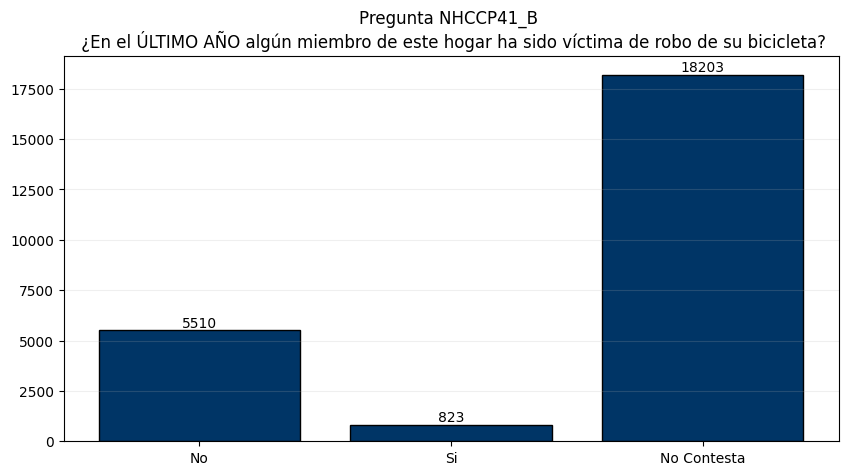

In [164]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP41_B'].value_counts().index.tolist(),data['NHCCP41_B'].value_counts().tolist(), edgecolor = 'black', color = '#003566')
plt.xticks([0,1,2], ['No','Si','No Contesta'])
plt.title('Pregunta NHCCP41_B \n ¿En el ÚLTIMO AÑO algún miembro de este hogar ha sido víctima de robo de su bicicleta?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

### NHCCP46	
¿Cuánto tiempo gastan caminando, en promedio, las personas de este hogar para llegar a los siguientes servicios o establecimientos más cercanos a la vivienda?:
1. Estación TransMilenio o paradero alimentador (solo para Bogotá y Soacha)
2. Paradero buses del SITP (solo para Bogotá y Soacha)
3. Paradero de transporte público (buses, busetas o colectivos)
4. Paradero de transporte intermunicipal
5. Parque o zonas verdes
6. Tienda o supermercado
7. Droguería o farmacia
8. Banco o cajero
9. CAI o estación de policía
10. Biblioteca
11. Escenarios culturales o recreativos
12. Cicloruta
13. Centro Médico

**Contestan 23173**

In [165]:
tiempo  = [i for i in data.columns if 'NHCCP46' in str(i)]
print(tiempo)

['NHCCP46A', 'NHCCP46B', 'NHCCP46C', 'NHCCP46D', 'NHCCP46E', 'NHCCP46F', 'NHCCP46G', 'NHCCP46H', 'NHCCP46I', 'NHCCP46J', 'NHCCP46K', 'NHCCP46L', 'NHCCP46M']


In [166]:
for i in tiempo:
    print(i, data[i].count())

NHCCP46A 23173
NHCCP46B 23173
NHCCP46C 23173
NHCCP46D 23173
NHCCP46E 23173
NHCCP46F 23173
NHCCP46G 23173
NHCCP46H 23173
NHCCP46I 23173
NHCCP46J 23173
NHCCP46K 23173
NHCCP46L 23173
NHCCP46M 23173


In [167]:
l_t = ['Estación TransMilenio o paradero alimentador',
         'Paradero buses del SITP',
         'Paradero de transporte público (buses, busetas o colectivos)',
         'Paradero de transporte intermunicipal',
         'Parque o zonas verdes',
         'Tienda o supermercado',
        'Droguería o farmacia',
        'Banco o cajero',
        'CAI o estación de policía',
        'Biblioteca',
        'Escenarios culturales o recreativos',
        'Cicloruta',
      'Centro Médico']

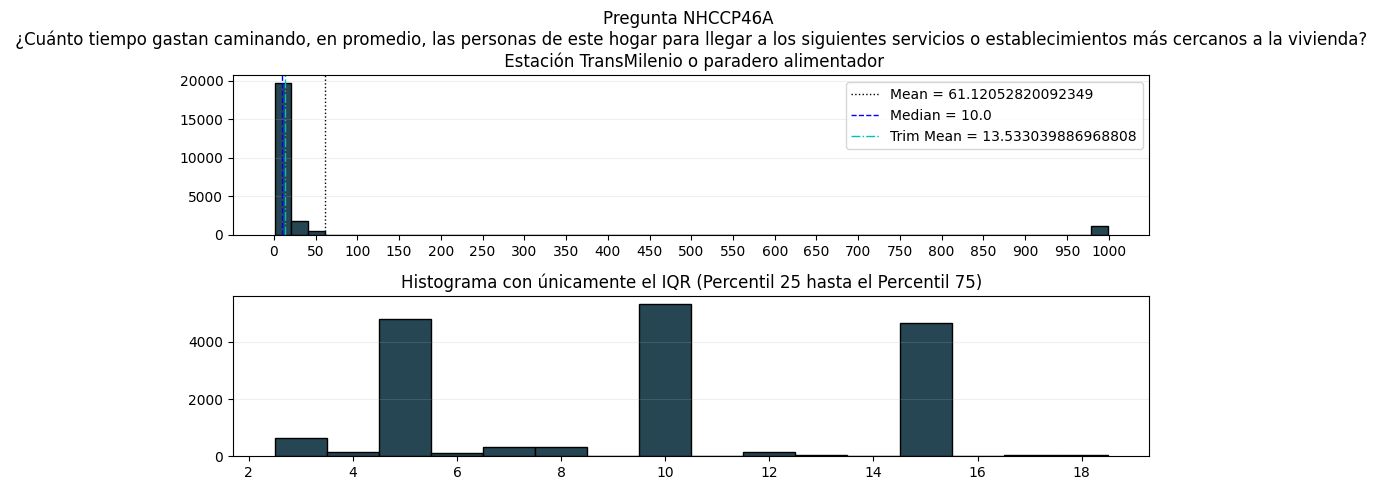

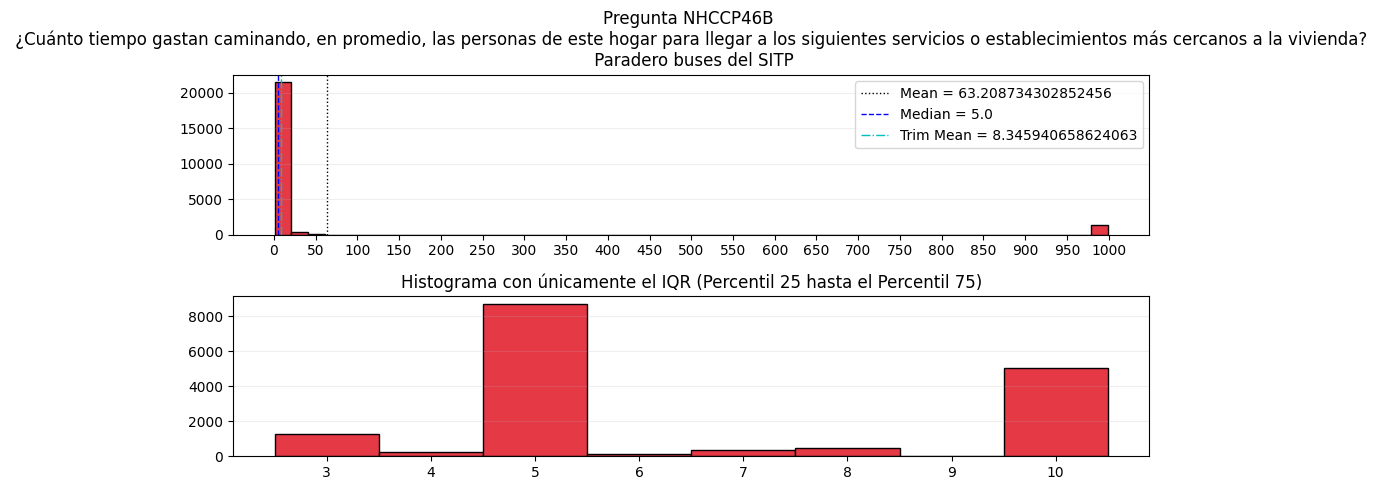

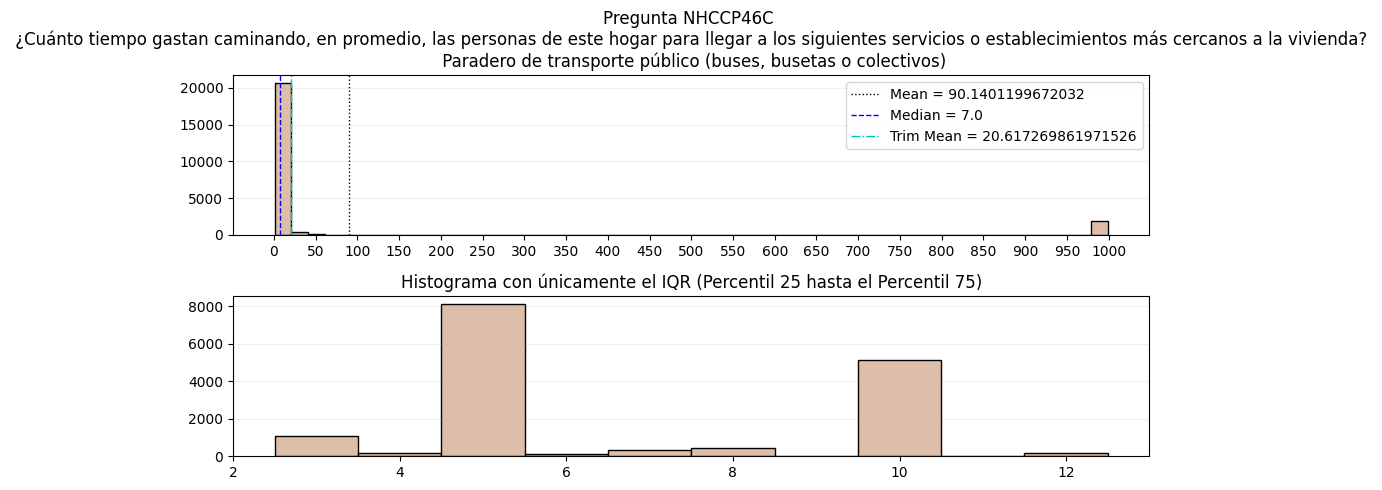

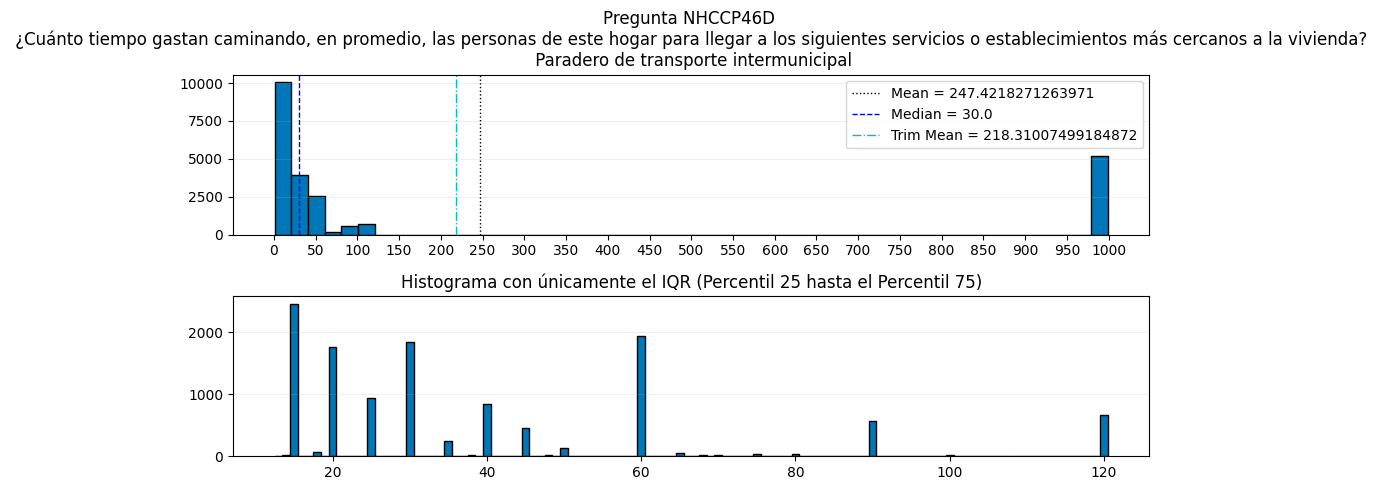

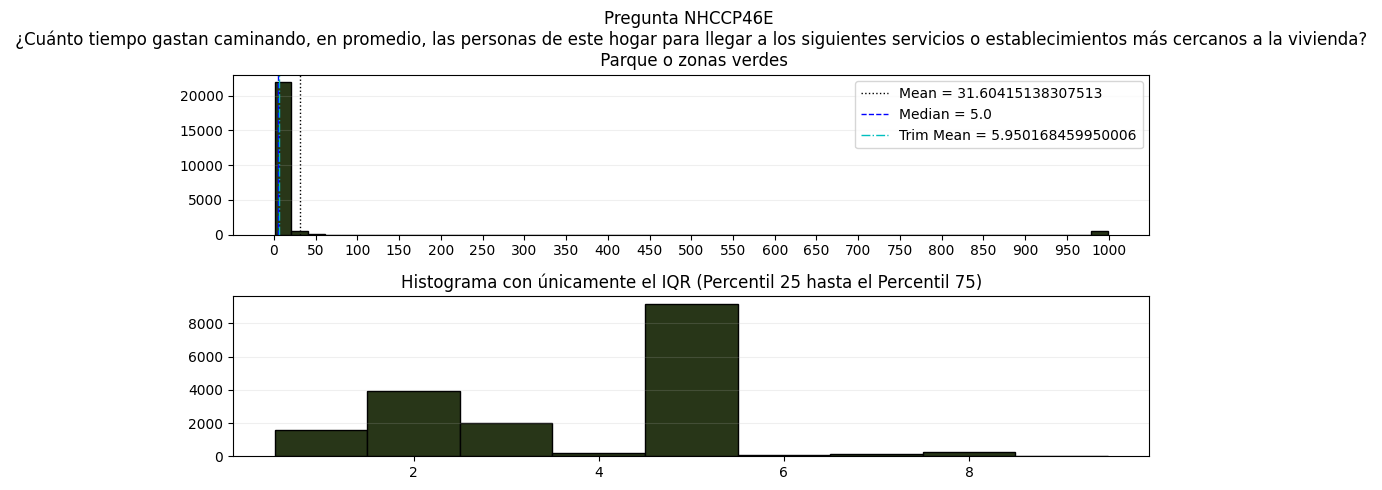

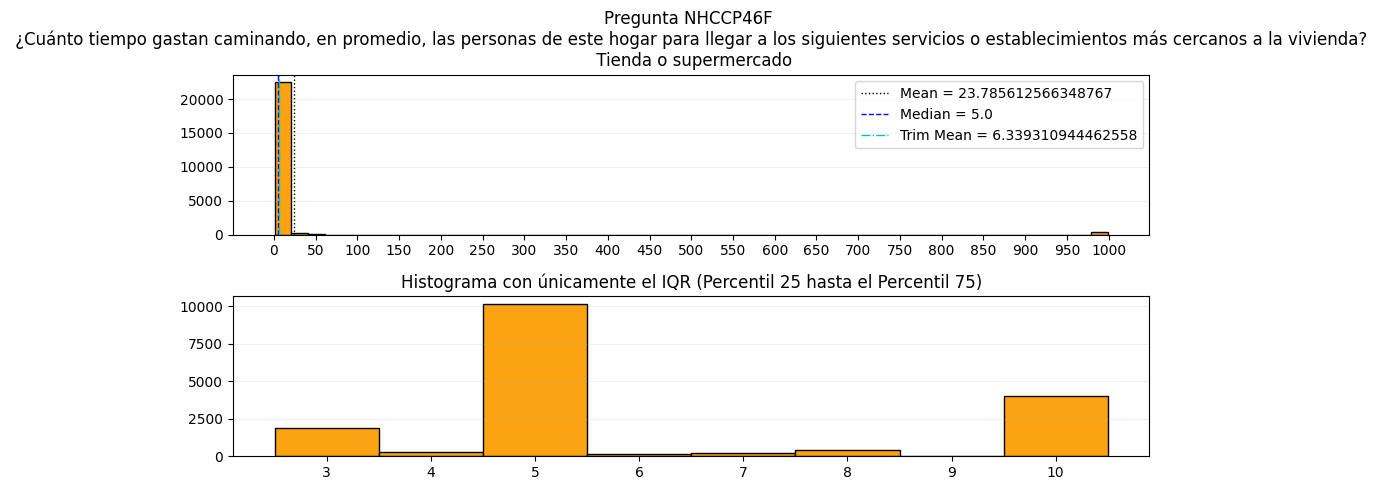

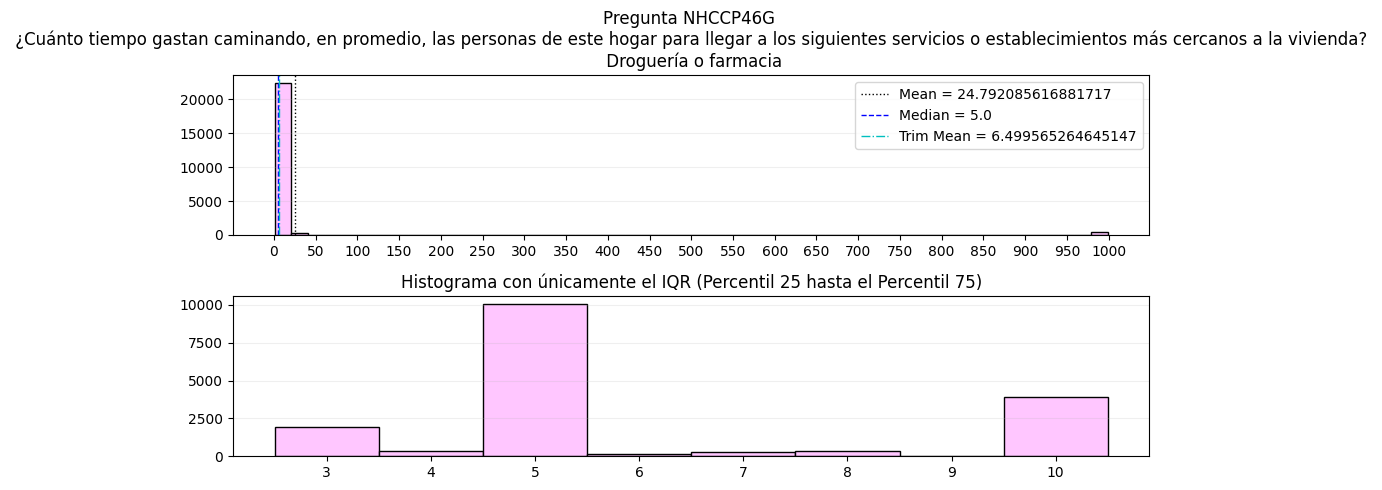

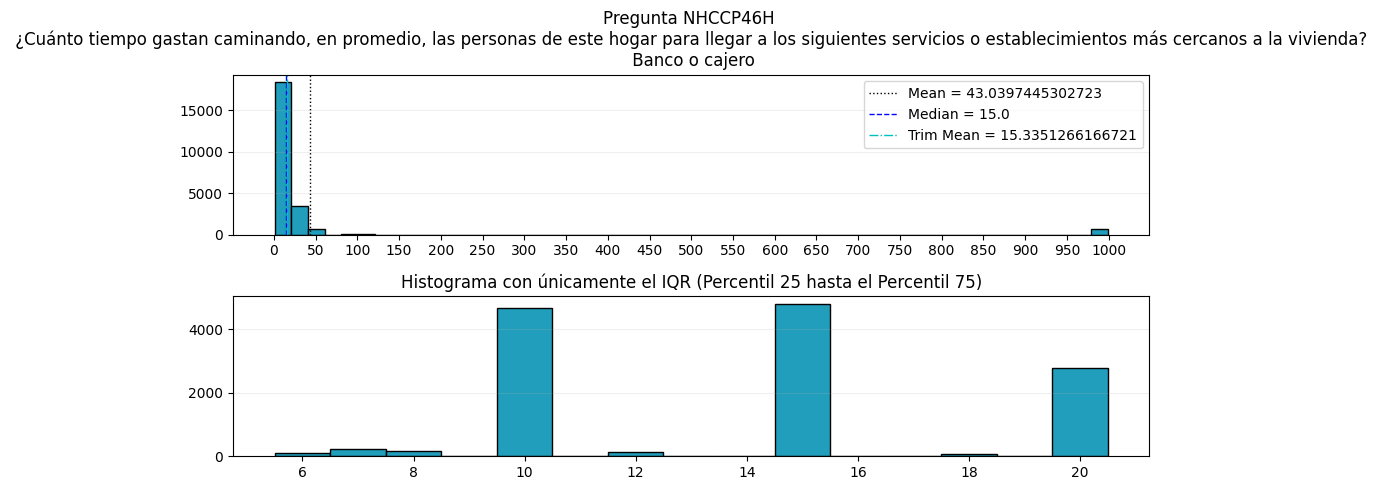

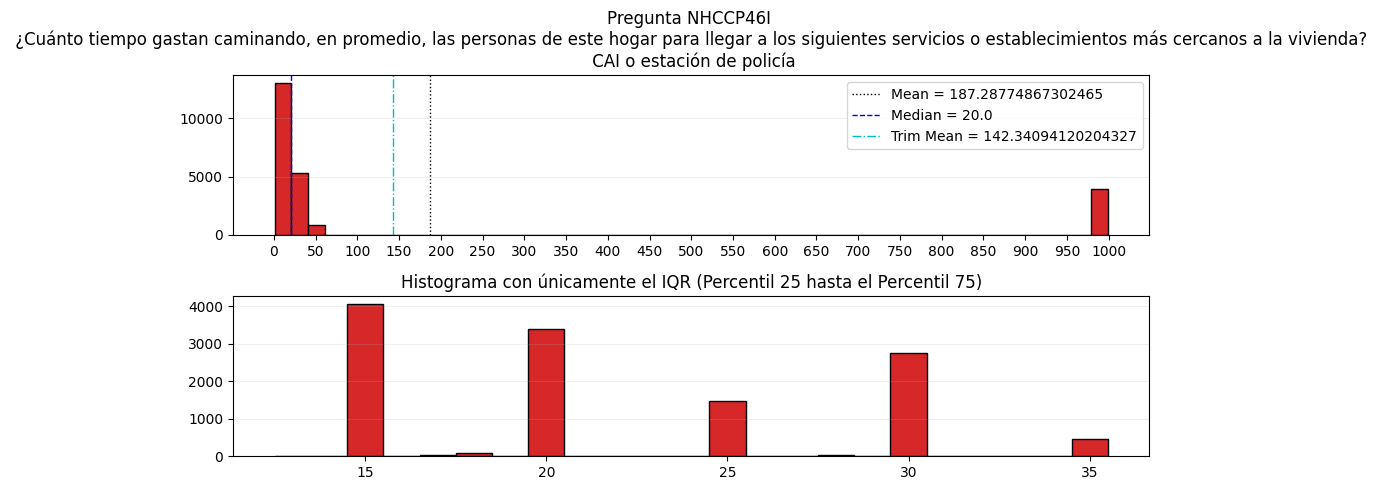

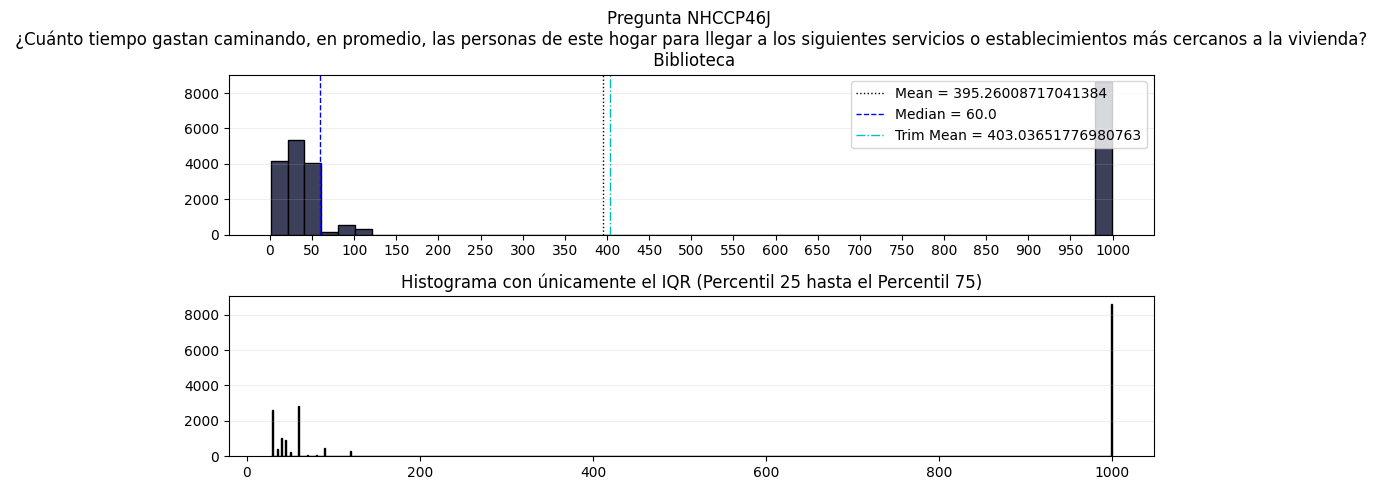

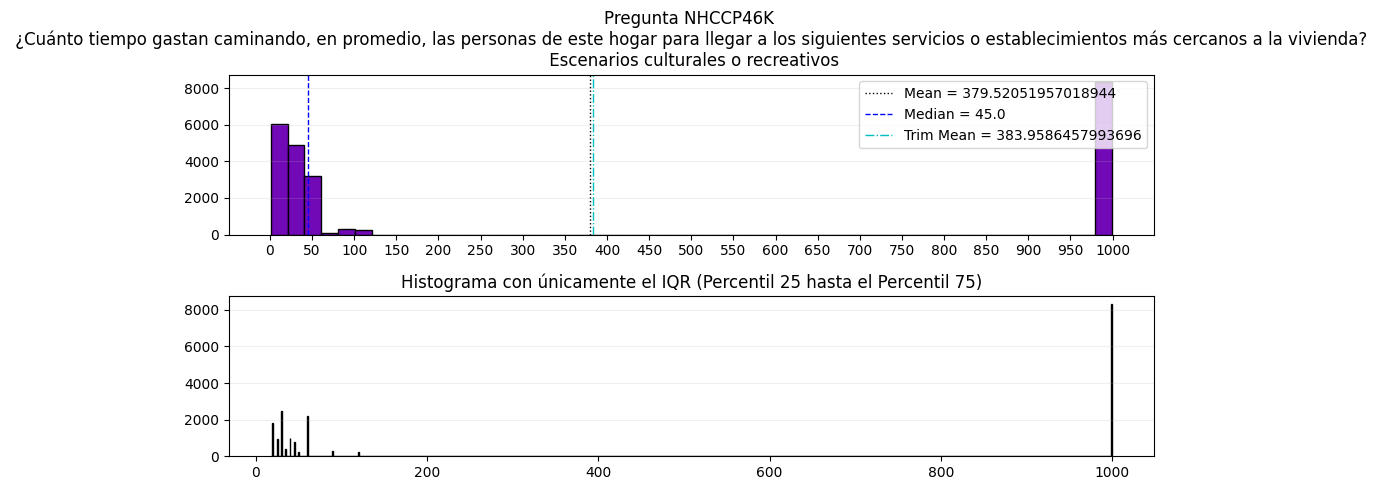

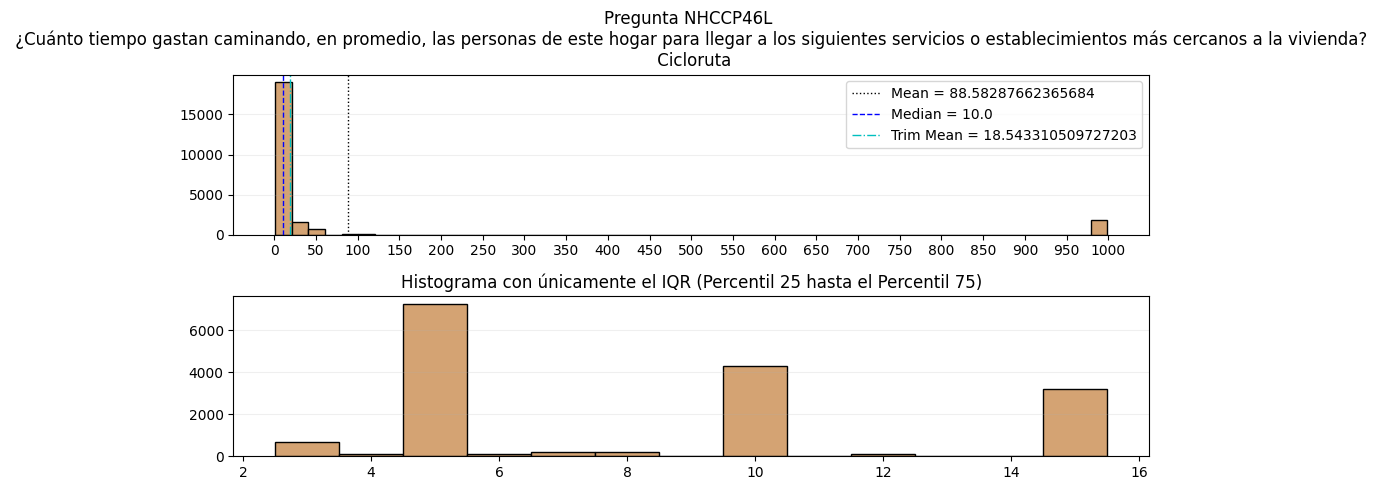

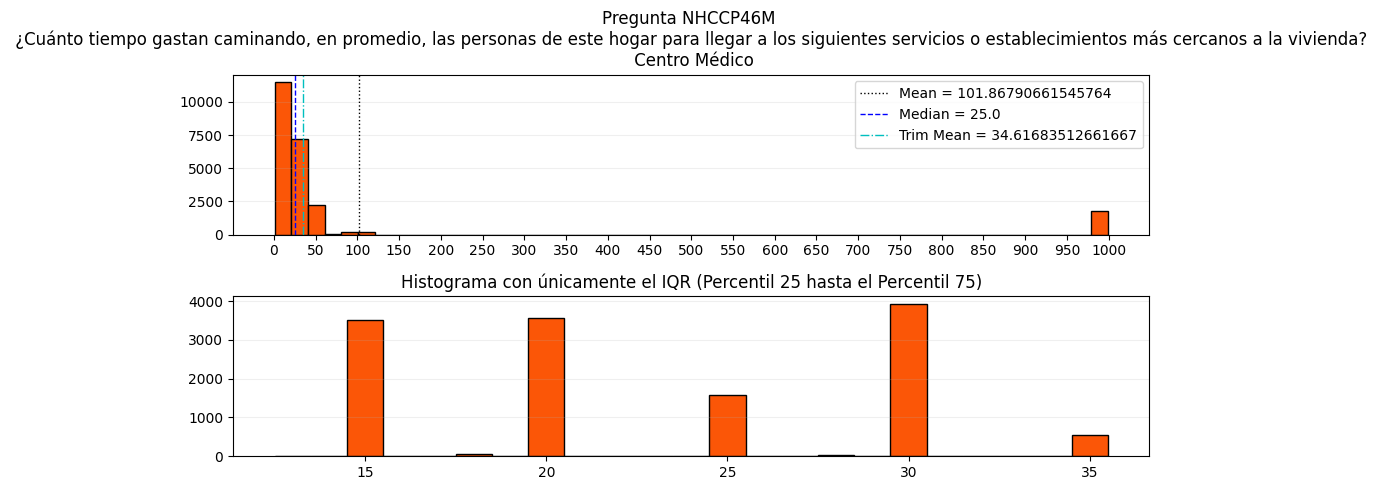

In [168]:
for i,j,z in zip(tiempo,l_t,colors):
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    counts, edges, bars = plt.hist(data[i], bins = 50, edgecolor = 'black', color = z)
    plt.xticks(range(0,1001,50))
    plt.axvline(data[i].mean(), color='k', linestyle=':', linewidth=1, label = f'Mean = {data[i].mean()}')
    plt.axvline(data[i].median(), color='b', linestyle='dashed', linewidth=1, label = f'Median = {data[i].median()}')
    plt.axvline(stats.trim_mean(data[i], 0.125), color='c', linestyle='-.', linewidth=1, label = f'Trim Mean = {stats.trim_mean(data[i], 0.125)}')
    plt.legend()
    plt.grid(alpha = 0.2, axis = 'y')
    plt.title(f'Pregunta {i} \n ¿Cuánto tiempo gastan caminando, en promedio, las personas de este hogar para llegar a los siguientes servicios o establecimientos más cercanos a la vivienda? \n {j}')
    plt.subplot(2,1,2)
    counts, edges, bars = plt.hist(data[i], bins = np.arange(data[i].quantile(0.25)-2,data[i].quantile(0.75)+2)-0.5, edgecolor = 'black', color = z)
    #plt.xticks(range(10))
    #plt.axvline(data[i].mean(), color='k', linestyle=':', linewidth=1, label = f'Media = {data[i].mean()}')
    #plt.axvline(data[i].median(), color='b', linestyle='dashed', linewidth=1, label = f'Mediana = {data[i].median()}')
    #plt.axvline(stats.trim_mean(data[i], 0.125), color='c', linestyle='-.', linewidth=1, label = f'Trim Mean = {stats.trim_mean(data[i], 0.125)}')
    #plt.legend()
    plt.grid(alpha = 0.2, axis = 'y')
    #plt.xticks(range(0,int(data[i].quantile(0.75)+2)))
    plt.title('Histograma con únicamente el IQR (Percentil 25 hasta el Percentil 75)')
    plt.tight_layout()
    plt.show()
    